In [ ]:
from IPython.display import Javascript
def keep_alive():
    display(Javascript('''
    function ConnectButton(){
        console.log("Connect pushed");
        document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
    }
    setInterval(ConnectButton, 60000);
    '''))
keep_alive()

<IPython.core.display.Javascript object>

# EDA

load the data set

In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Depression survey/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Depression survey/test.csv")
sample_sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Depression survey/sample_submission.csv")


In [ ]:
train.shape

(140700, 20)

In [ ]:
test.shape

(93800, 19)

In [ ]:
sample_sub.shape

(93800, 2)

In [ ]:
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [ ]:
sample_sub.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


In [ ]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [ ]:
test.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,27077.871962,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
test.duplicated().sum()

np.int64(0)

In [ ]:
train.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [ ]:
test.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,24632
Academic Pressure,75033
Work Pressure,18778
CGPA,75034


In [ ]:
!pip install pygwalker
import pygwalker as pyg

In [ ]:
walker = pyg.walk(train)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006344622c0d48eROCfQ7NqBvIFsMbn" style="height: auto">\n    <hea…

Check class Imbalance in the target column

<ipython-input-414-e956616bd208>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Depression",data=train,palette="Set2")


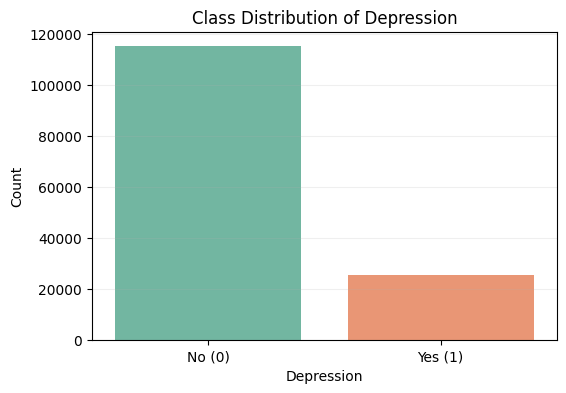

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x="Depression",data=train,palette="Set2")
plt.title("Class Distribution of Depression")
plt.xticks([0,1],["No (0)","Yes (1)"])
plt.ylabel("Count")
plt.grid(axis="y",alpha=0.2)
plt.show()

## Handling Nan values

In [ ]:
train.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


**Why there are a lot of Nan values?**

**profession** cause >> Students don’t have professions (only professionals do).



In [ ]:
train["Profession"].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

**Academic Pressure** cause >>  Professionals don’t experience academic pressure.

In [ ]:
# we will fill the Nan in the academic pressurs column with "Zero" according to the profession don't experience academic pressure
train["Academic Pressure"] = train["Academic Pressure"].fillna(0)
test["Academic Pressure"] = test["Academic Pressure"].fillna(0)

In [ ]:
train['Academic Pressure'].isna().sum()

np.int64(0)

**Work Pressure** cause >> Students don't have work Pressure.

In [ ]:
train["Work Pressure"] = train["Work Pressure"].fillna(0)
test["Work Pressure"] = test["Work Pressure"].fillna(0)

In [ ]:
train["Work Pressure"].isna().sum()

np.int64(0)

**CGPA** cause >> Professionals don't have a CGPA.


In [ ]:
train["CGPA"].fillna(0,inplace=True)
test["CGPA"].fillna(0,inplace=True)

<ipython-input-421-5dfe304e26ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["CGPA"].fillna(0,inplace=True)
<ipython-input-421-5dfe304e26ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

**Study Satisfaction** cause >> Professinals aren't stuedents.

In [ ]:
train["Study Satisfaction"].fillna(0,inplace = True)
test["Study Satisfaction"].fillna(0,inplace = True)

<ipython-input-422-2d7cc52d89a5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Study Satisfaction"].fillna(0,inplace = True)
<ipython-input-422-2d7cc52d89a5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
train.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,0
Work Pressure,0
CGPA,0


**Job Satisfaction**

In [ ]:
train["Job Satisfaction"].value_counts()

,count
Job Satisfaction,
2.0,24783
5.0,22812
1.0,22324
3.0,21951
4.0,20920


* Impute the Nans in workers >> median
* Impute the Nans in student >> 0

In [ ]:
train["Working Professional or Student"].value_counts()

,count
Working Professional or Student,
Working Professional,112799
Student,27901


Q : The Nans in Job satisfaction column is for Student or for Working profession?

In [ ]:
# Make a mask that contain series of true if this row is working professional
worker_mask_train = train["Working Professional or Student"] == "Working Professional"
worker_mask_test = test["Working Professional or Student"] == "Working Professional"


# for Workers : fill Nans with median because I have discrete numbers 1,2,3,4,5
# Selesct the job satisfiaction values of workers and calculate the median
# get all rows that contain workers in working professional and get the median of all rows
worker_median_train = train.loc[worker_mask_train, "Job Satisfaction"].median()
worker_median_test = test.loc[worker_mask_test, "Job Satisfaction"].median()

# fill nans in job satisfactions for workers with the median of workers rate satisfaction
# For Workers: set  Nans to median
train.loc[worker_mask_train, "Job Satisfaction"] = train.loc[worker_mask_train, "Job Satisfaction"].fillna(worker_median_train)
test.loc[worker_mask_test, "Job Satisfaction"] = test.loc[worker_mask_test, "Job Satisfaction"].fillna(worker_median_test)

# For Student : set Nans to 0
train.loc[~worker_mask_train, "Job Satisfaction"] = 0
test.loc[~worker_mask_test, "Job Satisfaction"] = 0


In [ ]:
train[worker_mask_train].head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.0,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.0,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.0,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1


In [ ]:
train["Job Satisfaction"].isna().sum()

np.int64(0)

In [ ]:
train.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,0
Work Pressure,0
CGPA,0


**Profession**

In [ ]:
train["Profession"].value_counts()

,count
Profession,
Teacher,24906
Content Writer,7814
Architect,4370
Consultant,4229
HR Manager,4022
...,...
Moderate,1
Analyst,1
Pranav,1


In [ ]:
train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

Assume that all nans in Profession is is stands for Unemployed or Student

In [ ]:
studen_mask_train = (train["Profession"].isna()) & (train["Working Professional or Student"] == "Student")
studen_mask_test = (test["Profession"].isna()) & (test["Working Professional or Student"] == "Student")

train.loc[studen_mask_train,"Profession"] = "Student"
test.loc[studen_mask_test,"Profession"] = "Student"
train["Profession"].isna().sum()

np.int64(8763)

In [ ]:
# Check if NaNs are from unemployed or other categories
print(train[train["Profession"].isna()]["Working Professional or Student"].value_counts())

Working Professional or Student
Working Professional    8763
Name: count, dtype: int64


In [ ]:
train["Profession"] = train["Profession"].fillna(train["Profession"].mode()[0])
test["Profession"] = test["Profession"].fillna(train["Profession"].mode()[0])  # Use train mode to avoid leakage

In [ ]:
train.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0


In [ ]:
test["Dietary Habits"].value_counts()

,count
Dietary Habits,
Moderate,33018
Unhealthy,30786
Healthy,29966
No,6
More Healthy,2
Indoor,1
Prachi,1
Male,1
Less Healthy,1


In [ ]:
# fill the nan values in Dietary Habits , Degree and Financial Stress wuth mode
train["Dietary Habits"].fillna("Moderate",inplace = True)
test["Dietary Habits"].fillna("Moderate",inplace = True)

train["Degree"].fillna(train["Degree"].mode()[0],inplace=True)
test["Degree"].fillna(test["Degree"].mode()[0],inplace = True)

<ipython-input-437-59c86c9da859>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Dietary Habits"].fillna("Moderate",inplace = True)
<ipython-input-437-59c86c9da859>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
train["Degree"].value_counts().head(10)

,count
Degree,
Class 12,14731
B.Ed,11691
B.Arch,8742
B.Com,8113
B.Pharm,5856
BCA,5739
M.Ed,5668
MCA,5234
BBA,5030


In [ ]:
train["Dietary Habits"].mode()

,Dietary Habits
0,Moderate


In [ ]:
train["Dietary Habits"].isna().sum()

np.int64(0)

In [ ]:
train["Dietary Habits"].isna().sum()

np.int64(0)

In [ ]:
train["Degree"].isna().sum()

np.int64(0)

In [ ]:
train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
train['Financial Stress'].value_counts()

,count
Financial Stress,
2.0,31451
5.0,28279
4.0,27765
1.0,27211
3.0,25990


fill the financial stress with median

In [ ]:
train['Financial Stress'].fillna(train['Financial Stress'].median(),inplace = True)
test['Financial Stress'].fillna(test['Financial Stress'].median(),inplace = True)

<ipython-input-445-88404e989ca6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Financial Stress'].fillna(train['Financial Stress'].median(),inplace = True)
<ipython-input-445-88404e989ca6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [ ]:
train.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0


##  Feature Engineering & Encoding Categorical columns

In [ ]:
train.dtypes

,0
id,int64
Name,object
Gender,object
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [ ]:
train_encoded = train.copy()
test_encoded = test.copy()

# Gender

In [ ]:
train_encoded["Gender"].value_counts()

,count
Gender,
Male,77464
Female,63236


In [ ]:
# Encode the Gender column using label encoding (mapping set male to 0 and Female to 1)
gender_mapping = {"Male":0,"Female":1}
train_encoded["Gender"] = train_encoded["Gender"].map(gender_mapping)
test_encoded["Gender"] = test_encoded["Gender"].map(gender_mapping)


In [ ]:
train_encoded["Gender"].value_counts()

,count
Gender,
0,77464
1,63236


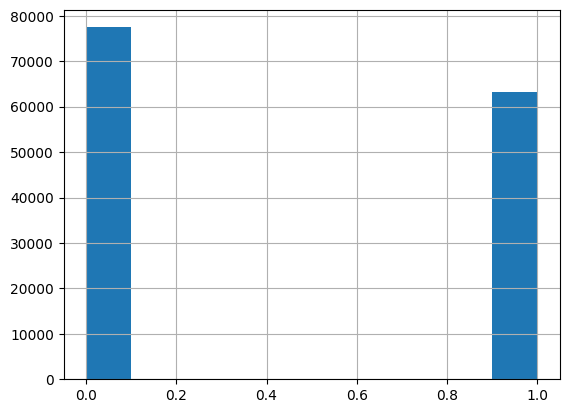

In [ ]:
# Plot the destrbution of class male and female to check the imbalance using histogram
import matplotlib.pyplot as plt
train_encoded["Gender"].hist()
plt.show()

# Age

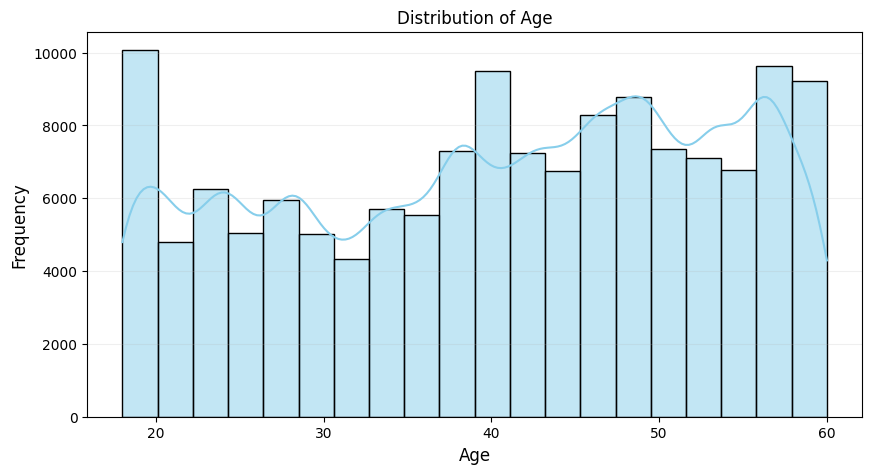

In [ ]:
# plot the distribution of the age to see which is the highest one in the data
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(train_encoded["Age"],bins=20,kde=True,color = "skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.grid(axis="y",alpha=0.2)
plt.show()


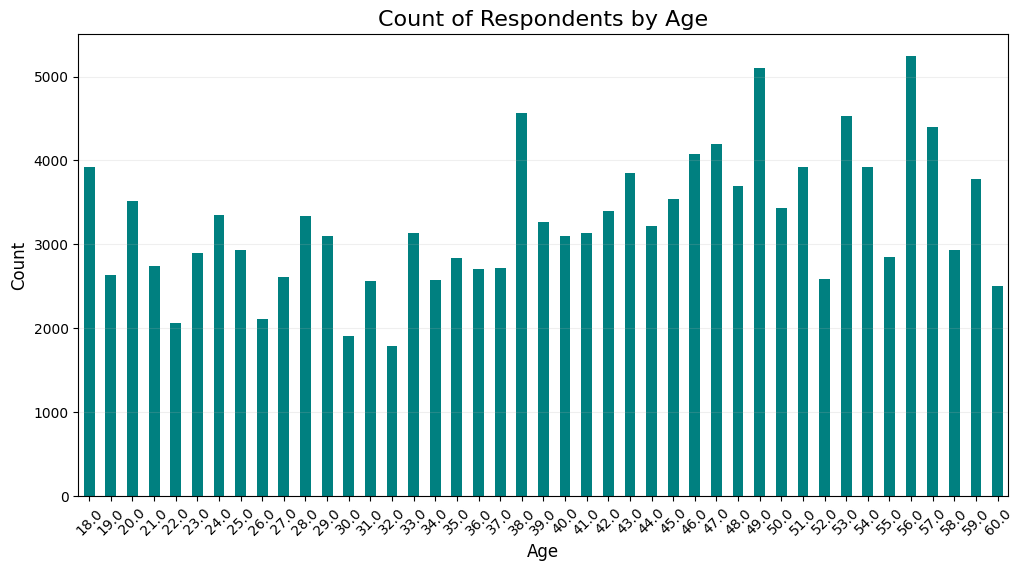

In [ ]:
plt.figure(figsize=(12, 6))
train_encoded['Age'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Count of Respondents by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.2)
plt.show()

**Check Outliers**

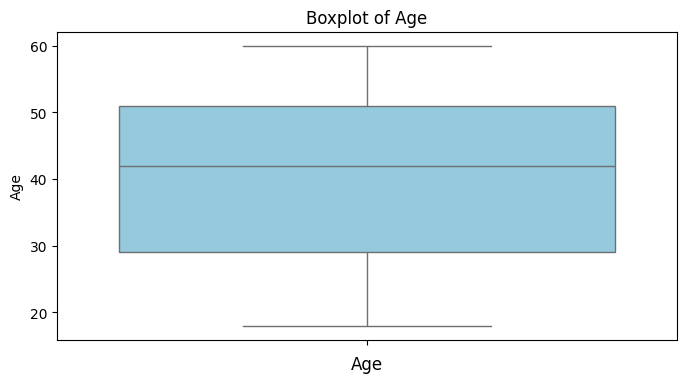

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(train_encoded["Age"],color="skyblue")
plt.title("Boxplot of Age")
plt.xlabel("Age",fontsize=12)
plt.show()

Bin age into groups to facilatate the visulazation

In [ ]:
bins = [17, 25, 35, 45, 55, 60]
labels = ["18-25","26-35","36-45","46-55","56-60"]
train_encoded["Age_Group"] = pd.cut(train_encoded["Age"], bins=bins, labels=labels, include_lowest=True)
test_encoded["Age_Group"] = pd.cut(test_encoded["Age"], bins=bins, labels=labels, include_lowest=True)

In [ ]:
train_encoded["Age_Group"].value_counts()

,count
Age_Group,
46-55,38328
36-45,33488
26-35,25965
18-25,24064
56-60,18855


**Calculate the Derpression Rate by Age Group**

In [ ]:
depression_rate=train_encoded.groupby("Age_Group")["Depression"].mean()*100

depression_rater=depression_rate.sort_values(ascending=False)

depression_rate

<ipython-input-458-6e12bbe15f7b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depression_rate=train_encoded.groupby("Age_Group")["Depression"].mean()*100


,Depression
Age_Group,
18-25,60.792055
26-35,36.102446
36-45,3.290731
46-55,1.093196
56-60,0.228056


In [ ]:
train_encoded.groupby("Age_Group")["Depression"].mean()

<ipython-input-459-00897ee78bfc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_encoded.groupby("Age_Group")["Depression"].mean()


,Depression
Age_Group,
18-25,0.607921
26-35,0.361024
36-45,0.032907
46-55,0.010932
56-60,0.002281


In [ ]:
depression_rate.index

CategoricalIndex(['18-25', '26-35', '36-45', '46-55', '56-60'], categories=['18-25', '26-35', '36-45', '46-55', '56-60'], ordered=True, dtype='category', name='Age_Group')

In [ ]:
depression_rate.values

array([60.79205452, 36.1024456 ,  3.29073101,  1.09319558,  0.22805622])

<ipython-input-462-2398a9a2017b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depression_rate.index,y=depression_rate.values,palette="viridis")


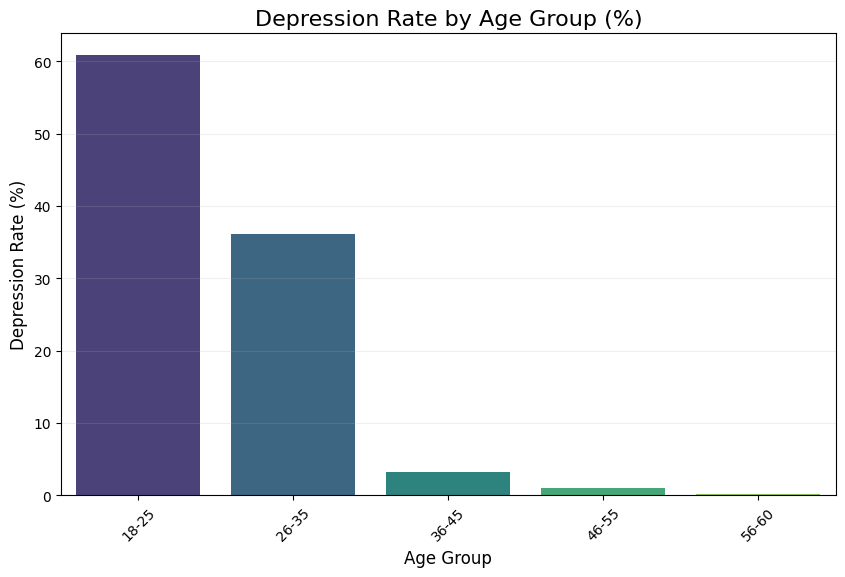

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=depression_rate.index,y=depression_rate.values,palette="viridis")
plt.title("Depression Rate by Age Group (%)",fontsize=16)
plt.xlabel("Age Group",fontsize=12)
plt.ylabel("Depression Rate (%)",fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y",alpha=0.2)
plt.show()

The age from 18-25 have the highest depression rate so when can create a new column called is_high_risk_age

In [ ]:

train_encoded["Is_High_Risk_Age"] = (train_encoded["Age_Group"] == "18-25").astype(int)
test_encoded["Is_High_Risk_Age"] = (test_encoded["Age_Group"] == "18-25").astype(int)
train_encoded["Is_High_Risk_Age"].value_counts()

,count
Is_High_Risk_Age,
0,116636
1,24064


In [ ]:
train_encoded["Age_Group"] = train_encoded["Age_Group"].map({
     "18-25": 5,
    "26-35": 4,
    "36-45": 3,
    "46-55": 2,
    "56-60": 1
}).astype(int)
test_encoded["Age_Group"] = test_encoded["Age_Group"].map({
    "18-25": 5,   # Highest depression risk
    "26-35": 4,
    "36-45": 3,
    "46-55": 2,
    "56-60": 1    # Lowest depression risk
}).astype(int)

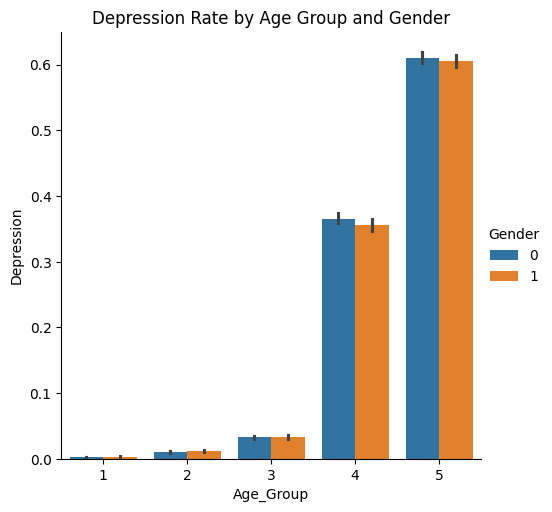

In [ ]:
sns.catplot(x='Age_Group', y='Depression', hue='Gender', kind='bar', data=train_encoded)
plt.title('Depression Rate by Age Group and Gender')
plt.show()

In [ ]:
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [ ]:
train_encoded["Age_Group"].isna().sum()

np.int64(0)

In [ ]:
train_encoded["Age"].isna().sum()

np.int64(0)

In [ ]:
train_encoded["Is_High_Risk_Age"].isna().sum()

np.int64(0)

# Depression

In [ ]:

train_encoded["Depression"].value_counts()

,count
Depression,
0,115133
1,25567


In [ ]:

train_encoded["Depression"].dtypes

dtype('int64')

**Check Imbalance**

<ipython-input-472-f12abb8c41e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Depression",data=train_encoded,palette="Set2")


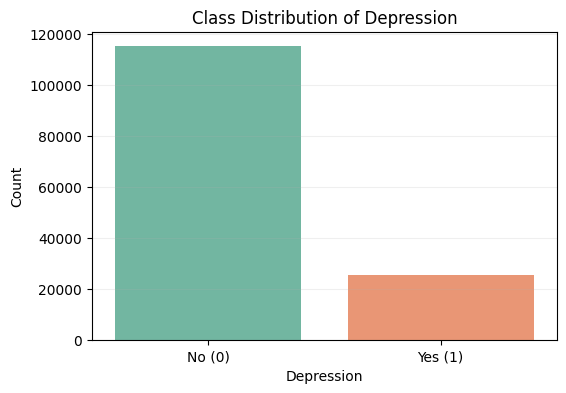

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Depression",data=train_encoded,palette="Set2")
plt.title("Class Distribution of Depression")
plt.xticks([0,1],["No (0)","Yes (1)"])
plt.ylabel("Count")
plt.grid(axis="y",alpha=0.2)
plt.show()

**see the correlation betweeen the Age and the target column "Depression"**

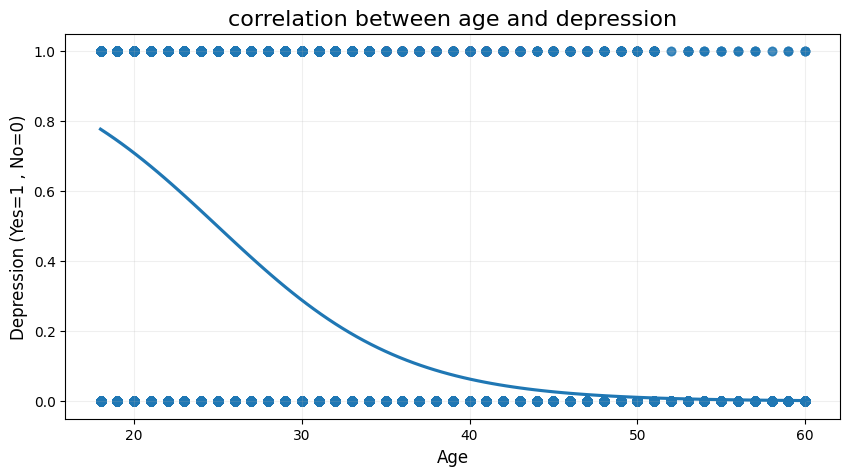

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x="Age",y="Depression",data=train_encoded,logistic=True,scatter_kws={"alpha":0.3})
plt.title("correlation between age and depression",fontsize=16)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Depression (Yes=1 , No=0)",fontsize=12)
plt.grid(alpha=0.2)
plt.show()

# City

In [ ]:
train_encoded["City"].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

cluster cities into broader categories

In [ ]:
city_to_region = {
    # North
    'Ludhiana': 'North', 'Delhi': 'North', 'Jaipur': 'North', 'Faridabad': 'North',
    'Ghaziabad': 'North', 'Gurgaon': 'North', 'Meerut': 'North', 'Agra': 'North',
    'Srinagar': 'North', 'Harsh': 'North', 'Khaziabad': 'North', 'Morena': 'North',
    'Ishanabad': 'North', 'Ayush': 'North', 'Harsha': 'North', 'Aditya': 'North',
    'Shrey': 'North', 'Ivaan': 'North', 'Gaurav': 'North', 'Reyansh': 'North',
    'Tushar': 'North', 'Armaan': 'North', 'Dhruv': 'North', 'Aaradhya': 'North',
    'Khushi': 'North', 'Hrithik': 'North', 'Saurav': 'North', 'Vikram': 'North',
    'Abhinav': 'North', 'Avni': 'North', 'Ira': 'North', 'Pratham': 'North',



    # South
    'Bangalore': 'South', 'Chennai': 'South', 'Hyderabad': 'South', 'Visakhapatnam': 'South',
    'Krishna': 'South', 'Vaishnavi': 'South', 'Keshav': 'South', 'Raghavendra': 'South',
    'Aishwarya': 'South', 'Nalini': 'South', 'Saanvi': 'South', 'Kashish': 'South',
    'Vaikot': 'South', 'Leela': 'South', 'Chhavi': 'South', 'Mahi': 'South',
    'Jhanvi': 'South', 'Aditi': 'South', 'Sara': 'South', 'Nandini': 'South',  'Anvi': 'South',


    # East
    'Kolkata': 'East', 'Patna': 'East', 'Molkata': 'East', 'Rolkata': 'East',
    'Golkata': 'East', 'Durgapur': 'East', 'Siliguri': 'East',
    'Krinda': 'East', 'Vidya': 'East', 'Bhavna': 'East', 'Rashi': 'East',
    'Ishkarsh': 'East', 'Kibara': 'East', 'Plata': 'East',


    # West
    'Mumbai': 'West', 'Pune': 'West', 'Ahmedabad': 'West', 'Surat': 'West',
    'Nagpur': 'West', 'Nashik': 'West', 'Vadodara': 'West', 'Rajkot': 'West',
    'Thane': 'West', 'Kalyan': 'West', 'Vasai-Virar': 'West', 'Malyan': 'West',
    'San Vasai-Virar': 'West', 'Mira': 'West', 'Thani': 'West',
    'Pratyush': 'West', 'Mihir': 'West', 'Parth': 'West', 'Atharv': 'West',
    'Siddhesh': 'West', 'Unirar': 'West', 'Unaly': 'West', 'Vaanya': 'West',
    'Keshav': 'West', 'Malyan': 'West', 'Galesabad': 'West', 'Pooja': 'West',


    # Central
    'Bhopal': 'Central', 'Indore': 'Central', 'Kanpur': 'Central', 'Lucknow': 'Central',
    'Varanasi': 'Central', 'Prayagraj': 'Central', 'Jabalpur': 'Central', 'Gwalior': 'Central',
    'Is Kanpur': 'Central', 'Mhopal': 'Central', 'Ghopal': 'Central', 'Vidhi': 'Central',
    'Ayansh': 'Central', 'Nalyan': 'Central', 'Itheg': 'Central',
    'Moreadhyay': 'Central', 'Kagan': 'Central', 'Ithal': 'Central',


    # Special Cases
    'No': 'Unknown', 'City': 'Unknown', 'Researcher': 'Unknown', 'Lawyer': 'Unknown',
    'Chemist': 'Unknown', 'M.Tech': 'Unknown', 'M.Com': 'Unknown', 'MCA': 'Unknown',
    'MSc': 'Unknown', 'ME': 'Unknown', '3.0': 'Unknown', 'Less than 5 Kalyan': 'Unknown',
    'Less Delhi': 'Unknown', 'More Delhi': 'Unknown', 'Less than 5 hours': 'Unknown',
    'No.12': 'Unknown', 'Malyansh': 'Unknown', 'Kashk': 'Unknown',
    'Tolkata': 'East'
}



**Feature Engineering** >> create a new column called region the distribute the cities into regions >> north ,south,east,west

In [ ]:
train_encoded["Region"] = train_encoded["City"].map(city_to_region)
test_encoded["Region"] = test_encoded["City"].map(city_to_region)

In [ ]:
print("Unmapped cities",train_encoded[train_encoded['Region'].isna()]['City'].unique())

Unmapped cities []


In [ ]:
print("Unmapped cities",test_encoded[test_encoded['Region'].isna()]['City'].unique())

Unmapped cities []


In [ ]:
train_encoded["Region"].isna().sum()

np.int64(0)

In [ ]:
train_encoded["Region"].value_counts()

,count
Region,
West,54218
North,35341
Central,21638
South,17859
East,11627
Unknown,17


In [ ]:
test_encoded.shape

(93800, 22)

In [ ]:
test_encoded.shape

(93800, 22)

**So what is the highest region that is have a high depression rate ??**

<ipython-input-483-cc6ad98c0ddc>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-483-cc6ad98c0ddc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


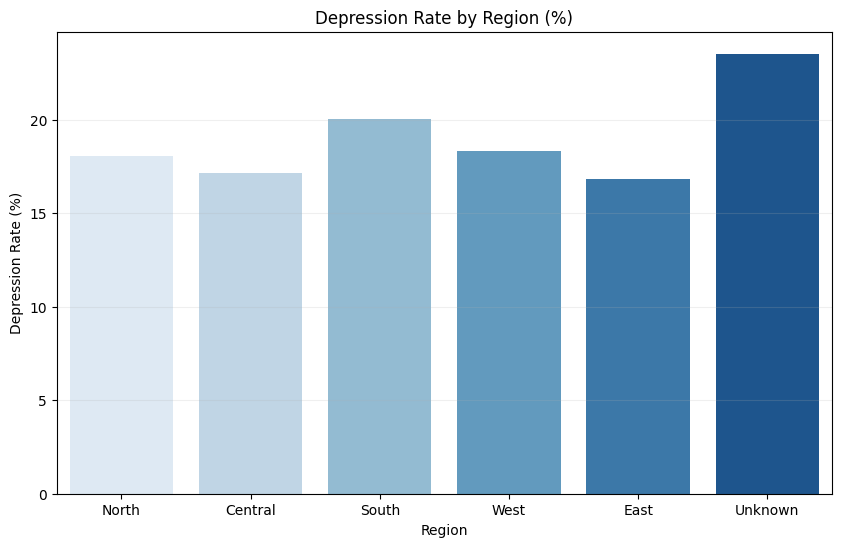

In [ ]:
import numpy as np
plt.figure(figsize=(10,6))
sns.barplot(
    x="Region",
    y="Depression",
    data=train_encoded,
    estimator=lambda x: np.mean(x)*100,
    ci=None,
    palette="Blues"
)
plt.title("Depression Rate by Region (%)")
plt.ylabel("Depression Rate (%)")
plt.grid(axis="y",alpha=0.2)
plt.show()

**We found that the south region is the highest depression**

In [ ]:
south_data=train_encoded[train_encoded["Region"]== "South"]
# calculate the number of the cites
south_data["City"].value_counts()


,count
City,
Visakhapatnam,5176
Hyderabad,4496
Bangalore,4123
Chennai,4044
Nandini,4
Saanvi,3
Mahi,3
Nalini,2
Raghavendra,1


**Drop rare cities**

In [ ]:
south_data=train_encoded[train_encoded["Region"]== "South"]
# calculate the number of the cites
south_data["City"].value_counts()

,count
City,
Visakhapatnam,5176
Hyderabad,4496
Bangalore,4123
Chennai,4044
Nandini,4
Saanvi,3
Mahi,3
Nalini,2
Raghavendra,1


In [ ]:
valid_cities = south_data["City"].value_counts()[south_data["City"].value_counts() > 100].index

In [ ]:
valid_cities.value_counts()

,count
City,
Visakhapatnam,1
Hyderabad,1
Bangalore,1
Chennai,1


In [ ]:
south_data_filtered=south_data[south_data["City"].isin(valid_cities)]

In [ ]:
depression_by_city = south_data_filtered.groupby("City")["Depression"].agg(["mean","count"])
depression_by_city

,mean,count
City,,
Bangalore,0.175600,4123
Chennai,0.194362,4044
Hyderabad,0.275133,4496
Visakhapatnam,0.159196,5176


In [ ]:
depression_by_city["mean"] = depression_by_city["mean"]*100 # convert to percentage
depression_by_city= depression_by_city.sort_values("mean",ascending=False)
depression_by_city

,mean,count
City,,
Hyderabad,27.513345,4496
Chennai,19.436202,4044
Bangalore,17.560029,4123
Visakhapatnam,15.919629,5176


**What is the city that have the highest depression rate?**

<ipython-input-491-538b3055c795>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


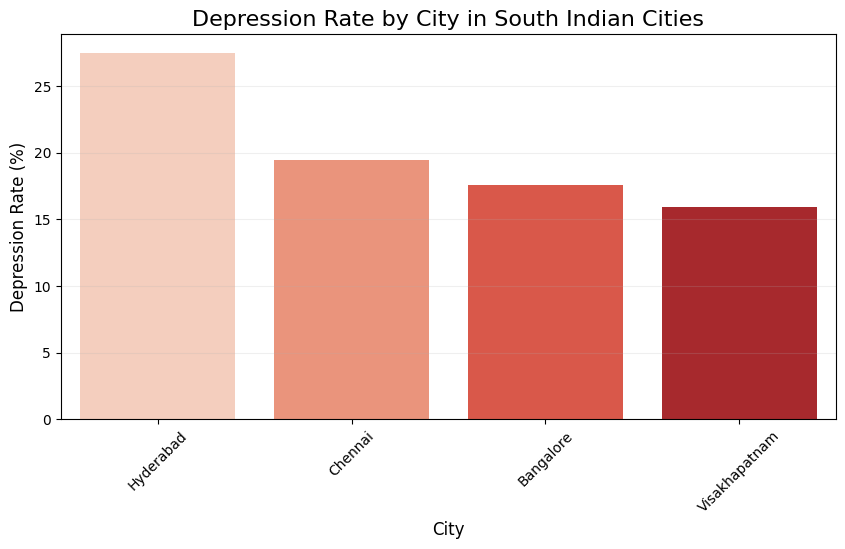

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=depression_by_city.index,
    y=depression_by_city["mean"],
    palette="Reds"
)
plt.title("Depression Rate by City in South Indian Cities", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Depression Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.2)
plt.show()


**So the most depression region is "South" & the most deprssion rate in the south is  "Hyderabad"**

so we will make a new binary column for hyderabad city because this is an indicator of high depression

In [ ]:
train_encoded["Is_High_Depression_City"] = (train_encoded["City"] == "Hyderabad").astype(int)
test_encoded["Is_High_Depression_City"] = (test_encoded["City"] == "Hyderabad").astype(int)

In [ ]:
train_encoded["Is_High_Depression_City"].value_counts()

,count
Is_High_Depression_City,
0,136204
1,4496


## Region

In [ ]:
# we will use one-hot encoding with the region because it have less value counts
train_encoded = pd.get_dummies(train_encoded,columns=["Region"])
test_encoded = pd.get_dummies(test_encoded,columns=["Region"])
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [ ]:
train_encoded.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Group', 'Is_High_Risk_Age', 'Is_High_Depression_City',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Unknown', 'Region_West'],
      dtype='object')

**Let's see which gender in Hyderabad city has high depression rate ??**

<Axes: xlabel='Age_Group', ylabel='count'>

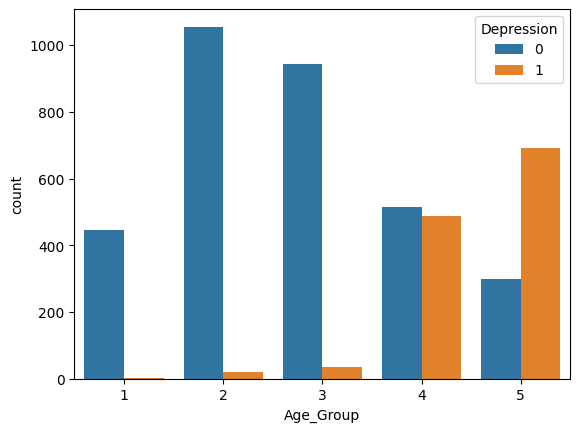

In [ ]:
sns.countplot(x='Age_Group', hue='Depression',
              data=train_encoded[train_encoded['City'] == 'Hyderabad'])

# Working Proffesional or Student

**Let's see which category has high depression rate students VS Working Professional ?**

In [ ]:
train_encoded["Working Professional or Student"].value_counts()

,count
Working Professional or Student,
Working Professional,112799
Student,27901


In [ ]:
depression_rate_for_work_stud = train_encoded.groupby("Working Professional or Student")["Depression"].mean()*100
depression_rate_for_work_stud

,Depression
Working Professional or Student,
Student,58.549873
Working Professional,8.183583


<ipython-input-499-9aee41e8626a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


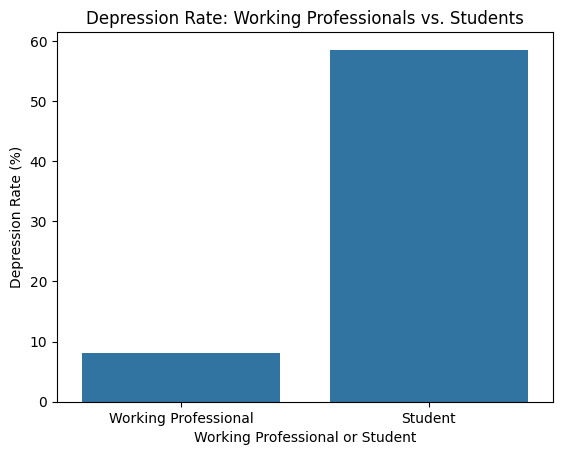

In [ ]:
sns.barplot(
    x='Working Professional or Student',
    y='Depression',
    data=train_encoded,
    estimator=lambda x: np.mean(x) * 100,
    ci=None
)
plt.title('Depression Rate: Working Professionals vs. Students')
plt.ylabel('Depression Rate (%)')
plt.show()

**Students have a Higher depression rate**

**Encode Working Professional or Student column**

In [ ]:
train_encoded["Is_Student"] = train_encoded["Working Professional or Student"].map({
    "Working Professional" : 0,
    "Student" : 1
}).astype(int)
test_encoded["Is_Student"] = test_encoded["Working Professional or Student"].map({
    "Working Professional" : 0,
    "Student" : 1
}).astype(int)


**The Students have the highest rate depression why?**

**There are some factors that may affect on the students such as:**

*   High Academic Pressure
*   Low Study Satisfaction
*   Poor Sleep Duration
*   Financial Stress




In [ ]:
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


# Profession

In [ ]:
train_encoded["Profession"].unique()

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Educational Consultant',
       'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
       'Architect', 'Mechanical Engineer', 'Customer Support',
       'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer',
       'Travel Consultant', 'Digital Marketer', 'Lawyer',
       'Research Analyst', 'Sales Executive', 'Doctor', 'Unemployed',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'Visakhapatnam',
       'PhD', '

In [ ]:
train_encoded.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Group', 'Is_High_Risk_Age', 'Is_High_Depression_City',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Unknown', 'Region_West', 'Is_Student'],
      dtype='object')

In [ ]:
profession_salary = {
    # High-paying professions (15+ LPA)
    'Investment Banker': 18,
    'Pilot': 22,
    'Medical Doctor': 16,
    'MBBS': 15,
    'Data Scientist': 14,
    'Software Engineer': 12,
    'Judge': 20,
    'PhD': 13,

    # Mid-range professions (8-14 LPA)
    'Architect': 9,
    'Mechanical Engineer': 8,
    'Civil Engineer': 7.5,
    'Financial Analyst': 10,
    'Marketing Manager': 11,
    'HR Manager': 9,
    'UX/UI Designer': 8.5,
    'Digital Marketer': 7,
    'Lawyer': 10,
    'Research Analyst': 8,

    # Entry-level professions (4-7 LPA)
    'Teacher': 4.5,
    'Accountant': 5,
    'Content Writer': 4,
    'Graphic Designer': 4.5,
    'Customer Support': 4,
    'Sales Executive': 5,
    'Consultant': 6,
    'Pharmacist': 5.5,
    'Electrician': 4.2,
    'Plumber': 4,
    'Chef': 4.5,

    # Special Cases
    'Unemployed/Student': 0,
    'Unemployed': 0,
    'Student': 0,
    'B.Com': 5,  # Degree-as-profession placeholder
    'MBA': 9,
    'BE': 6,
    'BCA': 4.5,
    'BBA': 5,
    'LLM': 8,

    # Ambiguous/Needs Clarification (assumed averages)
    'Family Consultant': 6,
    'Travel Consultant': 5,
    'Educational Consultant': 5.5,
    'Yuvraj': 5,        # Name-as-profession
    'Yogesh': 4,        # Name-as-profession
    'Dev': 7,           # Short for Developer?
    'FamilyVirar': 4,   # Likely typo
    'City Manager': 8,
    'Nagpur': 5,        # City-as-profession
    'Visakhapatnam': 5, # City-as-profession
    'Patna': 5,         # City-as-profession
    'Moderate': 5,      # Ambiguous
    'Pranav': 5       # Name-as-profession



}

In [ ]:
profession_salary.update({
    'Business Analyst': 12,       # Example value
    'Finanancial Analyst': 10,    # Likely typo for Financial Analyst?
    'Chemist': 6,
    'Entrepreneur': 5,
    'Manager': 8,
    'Researcher': 7,
    'Doctor': 18,                # Match to Medical Doctor
    'Academic': 6,
    'Working Professional': 7,   # Generic placeholder
    'Analyst': 6
})

In [ ]:
# Degrees-as-professions
profession_salary.update({
    'B.Ed': 4,
    'M.Ed': 5
})

# Non-professions
profession_salary.update({
    'Profession': 4,          # Generic default
    'Unveil': 4               # Unknown origin
})

In [ ]:
# Define default salaries based on profession type
default_salaries = {
    # Medical/High-Education (e.g., 'MD', 'Surgeon', 'M.Tech')
    'MD': 16,          # Similar to 'Medical Doctor'
    'M.Tech': 12,      # Similar to 'Software Engineer'
    'M.Pharm': 10,     # Similar to 'Pharmacist'
    'Surgeon': 18,     # High-paying medical role
    'B.Pharm': 6,      # Entry-level pharma
    'MCA': 8,          # Similar to 'Software Engineer (entry-level)'
    'ME': 7,           # Likely 'Mechanical Engineer'

    # Ambiguous/Placeholder (e.g., names, cities)
    'Samar': 5,        # Assume entry-level
    'Manvi': 5,        # Assume entry-level
    'Simran': 5,       # Assume entry-level
    'Surat': 5,        # City-as-profession → assume generic
    '24th': 5,         # Unclear → default
    'Name': 5,         # Placeholder
    'No': 0,           # Likely unemployed
    '3M': 5,           # Assume corporate role
    'City Consultant': 8,
    'Unhealthy': 0,    # Likely unemployed
    '0': 0             # Placeholder for numeric '0'
}

# Update the main dictionary
profession_salary.update(default_salaries)

In [ ]:
unknown_profession = ['Yuvraj', 'Yogesh', 'FamilyVirar', 'Nagpur',
    'Visakhapatnam', 'Patna', 'Moderate', 'Pranav'
]



In [ ]:
train_encoded["Profession"].isna().sum()

np.int64(0)

In [ ]:
train_encoded.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Group', 'Is_High_Risk_Age', 'Is_High_Depression_City',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Unknown', 'Region_West', 'Is_Student'],
      dtype='object')

In [ ]:
train_encoded["Profession_Salary_Rank"] = train_encoded["Profession"].map(profession_salary)
test_encoded["Profession_Salary_Rank"] = test_encoded["Profession"].map(profession_salary)

In [ ]:
unmapped_professions_train = set(train_encoded["Profession"]) - set(profession_salary.keys())
print("Unmapped professions (Train):", unmapped_professions_train)

Unmapped professions (Train): set()


In [ ]:

# For test data
unmapped_professions_test = set(test_encoded["Profession"]) - set(profession_salary.keys())
print("Unmapped professions (Test):", unmapped_professions_test)

Unmapped professions (Test): set()


In [ ]:
train_encoded["Profession_Salary_Rank"].isna().sum()

np.int64(0)

In [ ]:
train_encoded[train_encoded["Profession_Salary_Rank"].isna()]["Profession"].unique()

array([], dtype=object)

In [ ]:
train_encoded["Profession_Salary_Rank"].isna().sum()

np.int64(0)

In [ ]:
test_encoded.shape

(93800, 30)

In [ ]:
test_encoded.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0


Text(0.5, 1.0, 'Depression Vs Salary Rank')

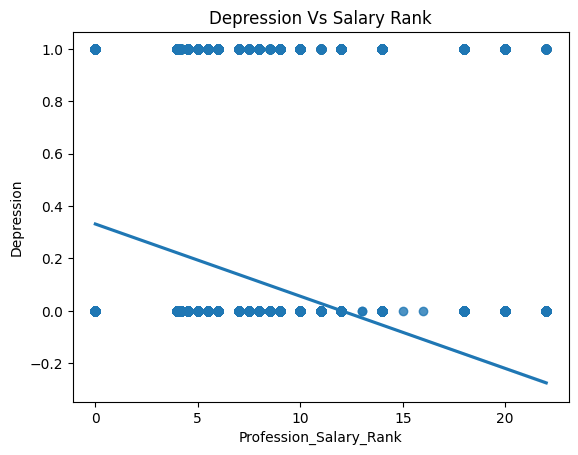

In [ ]:
sns.regplot(x="Profession_Salary_Rank",y="Depression",data=train_encoded)
plt.title("Depression Vs Salary Rank")

**This exactly what we expect that the salary rank for each job in profession column is inversely propotional with the depression rate**

In [ ]:
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


# Sleep Duration

In [ ]:
train_encoded["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

**Encode the sleep duration**

In [ ]:
def standardize_sleep(duration):
  """Handle non-string inputs"""
  # check that the duration is a string not an number to ensure that the function not crushed
  # isinstance is a built-in function that take an (object,classinfo) and retrun True,False
  if not isinstance(duration,str):
    duration = str(duration)
  duration = duration.lower().strip()

  # Handle common valid cases
  if duration == 'more than 8 hours' or duration in ["8-9 hours","9-11 hours","10-6 hours",]:
      return '8+ hours'
  elif duration == 'less than 5 hours' or duration in ["1-2 hours","1-3 hours"]:
      return '<5 hours'
  elif duration in ['5-6 hours', '6-7 hours', '7-8 hours']:
      return duration

  # Handle obvious typos
  elif 'than 5 hours' in duration:
      return '<5 hours'
  elif duration in ['9-5 hours', '9-5']:
      return '5-9 hours'

  # Convert other ranges to standard format
  elif '-' in duration and 'hours' in duration:

    try:

      hours = [float(x) for x in duration.split("hours")[0].strip().split("-")]

      if max(hours) > 10:
        return "Extreme/Invalid"

      avg_hours = sum(hours) / len(hours)
      if avg_hours < 5:
        return "<5 hours"
      elif avg_hours < 6:
        return "5-6 hours"
      elif avg_hours < 7:
        return "6-7 hours"
      elif avg_hours < 8:
        return "7-8 hours"
      else:
        return "8+ hours"
    except (ValueError, IndexError):
      return None
  # Return None for invalid entries
  else:
      return None

1. First creates 'Sleep_Clean' by standardizing raw sleep durations

In [ ]:
train_encoded["Sleep_Clean"] = train_encoded["Sleep Duration"].apply(standardize_sleep)
test_encoded["Sleep_Clean"] = test_encoded["Sleep Duration"].apply(standardize_sleep)


In [ ]:
main_categories = [
    '<5 hours',
    '5-6 hours',
    '6-7 hours',
    '7-8 hours',
    '8+ hours',
    'Extreme/Invalid'

]

2. Then creates 'Sleep_Category' by validating against allowed categories

.where(condition, None)
Keeps original values where the condition is True (i.e., valid categories).

Replaces invalid values with None.

In [ ]:
train_encoded["Sleep_Category"] = train_encoded["Sleep_Clean"].where(train_encoded["Sleep_Clean"].isin(main_categories),None)
test_encoded["Sleep_Category"] = test_encoded["Sleep_Clean"].where(test_encoded["Sleep_Clean"].isin(main_categories),None)

In [ ]:
print("Unique sleep categories in train:", train_encoded["Sleep_Clean"].unique())


Unique sleep categories in train: ['8+ hours' '<5 hours' '5-6 hours' '7-8 hours' None '6-7 hours'
 'Extreme/Invalid' '5-9 hours']


In [ ]:
train_encoded["Sleep_Category"].isna().sum()

np.int64(18)

In [ ]:
print("Main categories defined:", main_categories)

Main categories defined: ['<5 hours', '5-6 hours', '6-7 hours', '7-8 hours', '8+ hours', 'Extreme/Invalid']


3. Finally fills any remaining NAs with the most common category

In [ ]:
most_common = train_encoded['Sleep_Category'].mode()[0]
train_encoded['Sleep_Category'] = train_encoded['Sleep_Category'].fillna(most_common)
test_encoded['Sleep_Category'] = test_encoded['Sleep_Category'].fillna(most_common)

Ordinal encoding

In [ ]:
sleep_order = {
    '<5 hours': 5,      # Highest risk (short sleep)
    '5-6 hours': 3,     # Moderate risk
    '6-7 hours': 1,     # Lowest risk (optimal sleep)
    '7-8 hours': 2,     # Slightly elevated
    '8+ hours': 4,      # High risk (long sleep)
    'Extreme/Invalid': 6 # Separate category
}

In [ ]:
train_encoded["Sleep_Score"] = train_encoded["Sleep_Category"].map(sleep_order)
test_encoded["Sleep_Score"] = test_encoded["Sleep_Category"].map(sleep_order)

In [ ]:
train_encoded["Sleep_Score"].isna().sum()

np.int64(0)

In [ ]:
test_encoded["Sleep_Score"].isna().sum()

np.int64(0)

In [ ]:
train_encoded["Sleep_Score"].value_counts()

,count
Sleep_Score,
5,38834
2,36974
4,32731
3,32147
1,8
6,6


In [ ]:
test_encoded.shape

(93800, 33)

In [ ]:
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [ ]:
train_encoded.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Group', 'Is_High_Risk_Age', 'Is_High_Depression_City',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Unknown', 'Region_West', 'Is_Student', 'Profession_Salary_Rank',
       'Sleep_Clean', 'Sleep_Category', 'Sleep_Score'],
      dtype='object')

In [ ]:
train_encoded.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Group', 'Is_High_Risk_Age', 'Is_High_Depression_City',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Unknown', 'Region_West', 'Is_Student', 'Profession_Salary_Rank',
       'Sleep_Clean', 'Sleep_Category', 'Sleep_Score'],
      dtype='object')

# Dietary Habits

In [ ]:
train_encoded["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', 'No Healthy', 'Less Healthy', 'M.Tech',
       'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'], dtype=object)

In [ ]:
train_encoded["Dietary Habits"].value_counts()

,count
Dietary Habits,
Moderate,49709
Unhealthy,46227
Healthy,44741
Yes,2
More Healthy,2
No,2
Pratham,1
Gender,1
BSc,1


In [ ]:
diet_counts=train_encoded["Dietary Habits"].value_counts()
rare_categories = diet_counts[diet_counts < 50].index
rare_categories

Index(['Yes', 'More Healthy', 'No', 'Pratham', 'Gender', 'BSc',
       'Less than Healthy', '3', '1.0', 'Hormonal', 'Electrician', 'Mihir',
       'No Healthy', 'Less Healthy', 'M.Tech', 'Vegas', 'Male', 'Indoor',
       'Class 12', '2'],
      dtype='object', name='Dietary Habits')

In [ ]:
diet_counts_test=test_encoded["Dietary Habits"].value_counts()
rare_categories_test = diet_counts[diet_counts < 50].index
rare_categories_test

Index(['Yes', 'More Healthy', 'No', 'Pratham', 'Gender', 'BSc',
       'Less than Healthy', '3', '1.0', 'Hormonal', 'Electrician', 'Mihir',
       'No Healthy', 'Less Healthy', 'M.Tech', 'Vegas', 'Male', 'Indoor',
       'Class 12', '2'],
      dtype='object', name='Dietary Habits')

In [ ]:
# Step 2: Create a dictionary mapping rare categories to "Other"
replace_dict = {cat: "Other" for cat in rare_categories}
replace_dict

{'Yes': 'Other',
 'More Healthy': 'Other',
 'No': 'Other',
 'Pratham': 'Other',
 'Gender': 'Other',
 'BSc': 'Other',
 'Less than Healthy': 'Other',
 '3': 'Other',
 '1.0': 'Other',
 'Hormonal': 'Other',
 'Electrician': 'Other',
 'Mihir': 'Other',
 'No Healthy': 'Other',
 'Less Healthy': 'Other',
 'M.Tech': 'Other',
 'Vegas': 'Other',
 'Male': 'Other',
 'Indoor': 'Other',
 'Class 12': 'Other',
 '2': 'Other'}

In [ ]:
test_encoded["Dietary Habits"].isna().sum()

np.int64(0)

In [ ]:
# Step 2: Replace rare categories in BOTH train and test
train_encoded["Dietary Habits"] = train_encoded["Dietary Habits"].replace(replace_dict)
test_encoded["Dietary Habits"] = test_encoded["Dietary Habits"].replace(replace_dict)

In [ ]:
test_encoded["Dietary Habits"].isna().sum()

np.int64(0)

In [ ]:
train_encoded["Dietary Habits"].value_counts()

,count
Dietary Habits,
Moderate,49709
Unhealthy,46227
Healthy,44741
Other,23


In [ ]:
diet_mapping = {
    "Healthy": 0,
    "Moderate": 1,
    "Unhealthy": 2,
    "Other": 3
}

In [ ]:
train_encoded["Dietary Habits"] = train_encoded["Dietary Habits"].map(diet_mapping)
test_encoded["Dietary Habits"] = test_encoded["Dietary Habits"].map(diet_mapping)

In [ ]:
test_encoded["Dietary Habits"].isna().sum()

np.int64(13)

In [ ]:
test_encoded["Dietary Habits"].fillna(train_encoded["Dietary Habits"].mode()[0],inplace=True)

<ipython-input-551-dee4d1112300>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_encoded["Dietary Habits"].fillna(train_encoded["Dietary Habits"].mode()[0],inplace=True)


In [ ]:
test_encoded["Dietary Habits"].isna().sum()

np.int64(0)

In [ ]:
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [ ]:
test_encoded["Dietary Habits"].isna().sum()

np.int64(0)

# Degree

sort the degree based on Level

In [ ]:
train_encoded["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [ ]:
train_encoded["Degree"].value_counts()

,count
Degree,
Class 12,14731
B.Ed,11691
B.Arch,8742
B.Com,8113
B.Pharm,5856
...,...
LCA,1
B B.Com,1
RCA,1


In [ ]:
degree_hierarchy = {
    # PhD/MD Level (Highest)
    'PhD': 8,
    'MD': 8,
    'MBBS': 8,

    # Masters Level
    'MBA': 7,
    'M.Tech': 7,
    'MSc': 7,
    'MA': 7,
    'M.Com': 7,
    'M.Ed': 7,
    'M.Pharm': 7,

    # Professional Degrees
    'LLB': 6,
    'B.Arch': 6,
    'B.Tech': 6,

    # Bachelor's Level
    'BSc': 5,
    'BA': 5,
    'B.Com': 5,
    'BBA': 5,
    'BCA': 5,
    'B.Pharm': 5,
    'BHM': 5,

    # Diploma/Certification
    'MCA': 4,
    'Class 12': 3,

    # Placeholder for others
    'Other': 1
}

In [ ]:
degree_hierarchy.update({
    'LLB': 6,        # Law
    'SArch': 6,       # Science in Architecture
    'ETech': 5,       # Engineering Technology
    'PPharm': 5       # Pharmacy
})

In [ ]:
degree_hierarchy.update({
    'BARCH': 6,          # Alternative to B.Arch
    'MTECH': 7,          # Common variant
    'BCOM': 5,           # Bachelor of Commerce
    'BHMS': 5,           # Alternative medicine
    'BVSC': 6            # Veterinary science
})

In [ ]:
import re
def clean_degree(degree):
    degree = str(degree).strip().upper()

    # Standardize common variations
    replacements = {
        'B.': 'B', 'M.': 'M', 'L.': 'L', 'S.': 'S', 'E.': 'E', 'P.': 'P',
        'TECH': 'TECH', 'ARCH': 'ARCH', 'PHARM': 'PHARM', 'COM': 'COM'
    }
    for old, new in replacements.items():
        degree = degree.replace(old, new)

    # Handle compound degrees
    if any(x in degree for x in ['/', '&', '+']):
        return max([degree_hierarchy.get(clean_degree(p), 1)
                   for p in re.split('[/&+]', degree)])

    # Extract primary degree
    degree = ''.join(filter(str.isalnum, degree.split()[0]))
    return degree

In [ ]:
train_encoded["Degree_Level"]=(train_encoded["Degree"].apply(clean_degree).map(degree_hierarchy)).fillna(1)
test_encoded["Degree_Level"]=(test_encoded["Degree"].apply(clean_degree).map(degree_hierarchy)).fillna(1)

In [ ]:
train_encoded["Degree_Level"].isna().sum()

np.int64(0)

In [ ]:
test_encoded.shape

(93800, 34)

In [ ]:
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


# Have you ever had suicidal thoughts ?

In [ ]:
train_encoded["Have you ever had suicidal thoughts ?"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
suicidal_mapping = {
    "Yes":1,
    "No":0
}
train_encoded["Suicidal_Thoughts"] = train_encoded["Have you ever had suicidal thoughts ?"].map(suicidal_mapping)
test_encoded["Suicidal_Thoughts"] = test_encoded["Have you ever had suicidal thoughts ?"].map(suicidal_mapping)

In [ ]:
train_encoded["Suicidal_Thoughts"].unique()

array([0, 1])

# Family History of Mental Illness

In [ ]:
train_encoded["Family History of Mental Illness"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
mental_mapping = {
    "Yes":1,
    "No":0
}
train_encoded["Mental_Illness"] = train_encoded["Family History of Mental Illness"].map(mental_mapping)
test_encoded["Mental_Illness"] = test_encoded["Family History of Mental Illness"].map(mental_mapping)

In [ ]:
train_encoded.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Group', 'Is_High_Risk_Age', 'Is_High_Depression_City',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Unknown', 'Region_West', 'Is_Student', 'Profession_Salary_Rank',
       'Sleep_Clean', 'Sleep_Category', 'Sleep_Score', 'Degree_Level',
       'Suicidal_Thoughts', 'Mental_Illness'],
      dtype='object')

In [ ]:
test_encoded.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Age_Group',
       'Is_High_Risk_Age', 'Is_High_Depression_City', 'Region_Central',
       'Region_East', 'Region_North', 'Region_South', 'Region_Unknown',
       'Region_West', 'Is_Student', 'Profession_Salary_Rank', 'Sleep_Clean',
       'Sleep_Category', 'Sleep_Score', 'Degree_Level', 'Suicidal_Thoughts',
       'Mental_Illness'],
      dtype='object')

In [ ]:
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


# Visualization

In [ ]:
train_encoded.columns



Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Group', 'Is_High_Risk_Age', 'Is_High_Depression_City',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Unknown', 'Region_West', 'Is_Student', 'Profession_Salary_Rank',
       'Sleep_Clean', 'Sleep_Category', 'Sleep_Score', 'Degree_Level',
       'Suicidal_Thoughts', 'Mental_Illness'],
      dtype='object')

In [ ]:
def plot_depression_rate(feature):
  plt.figure(figsize=(10,5))
  (train_encoded.groupby(feature)["Depression"].mean().sort_values().plot(kind="bar",color="skyblue"),
  plt.axhline(train_encoded["Depression"].mean(),color="red",linestyle="--"))
  plt.ylabel("Depression Rate (%)")
  plt.title(f"Depression Rate by {feature}")
  plt.show()


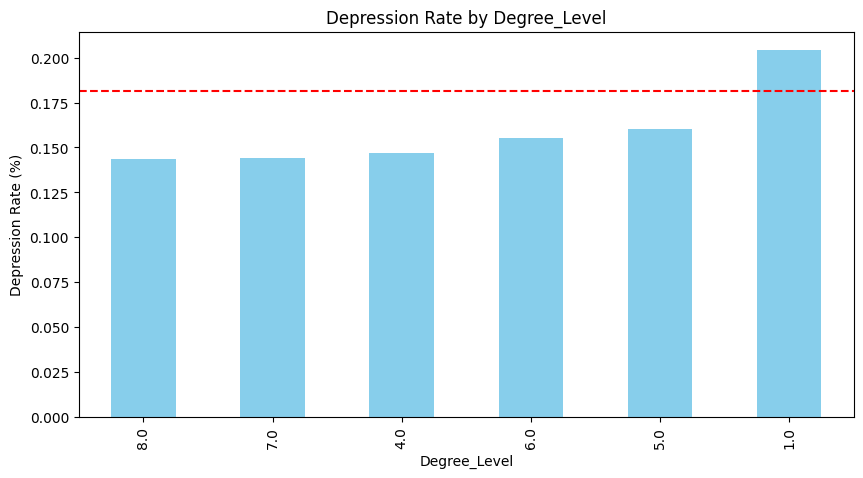

In [ ]:
plot_depression_rate("Degree_Level")

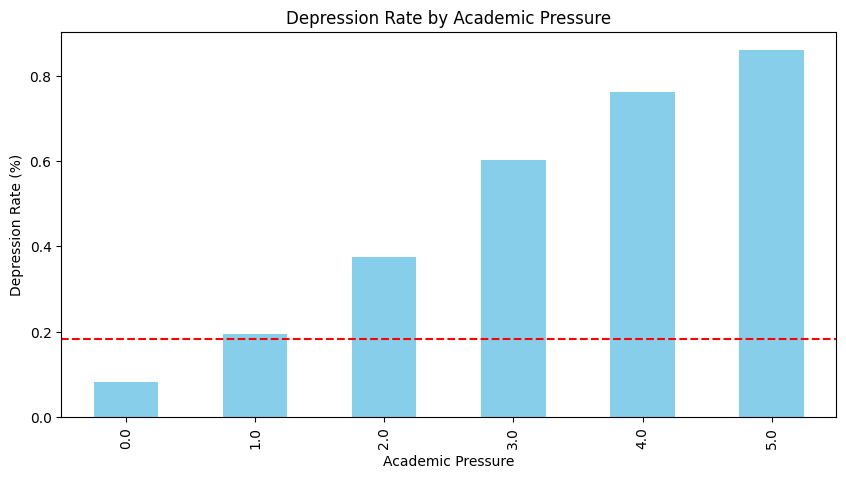

In [ ]:
plot_depression_rate("Academic Pressure")

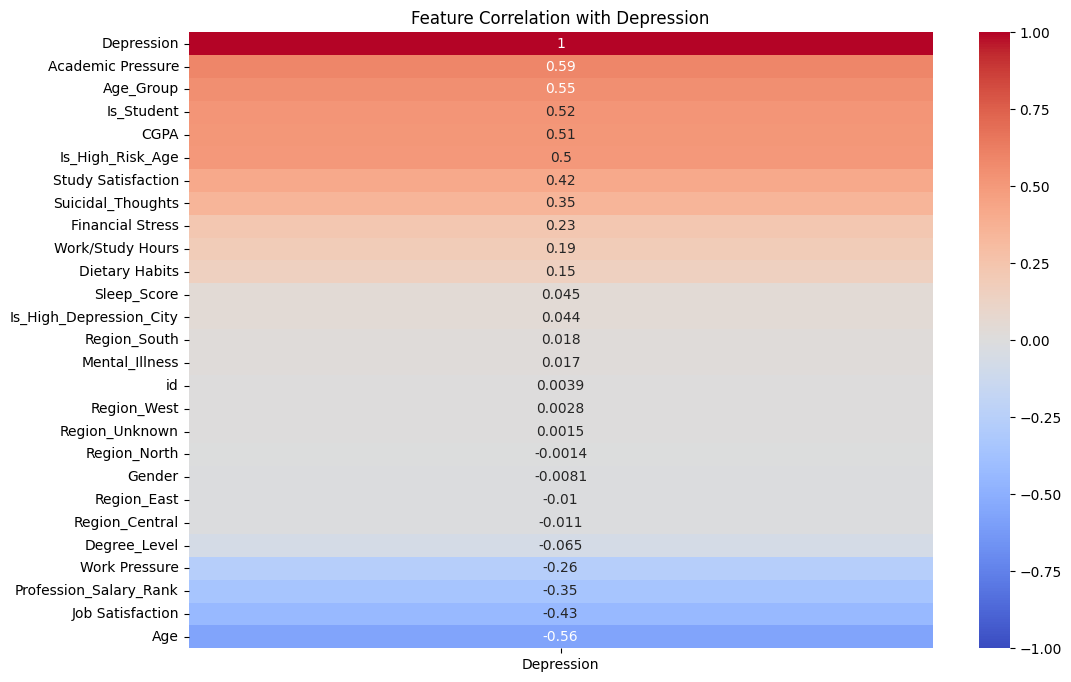

In [ ]:
plt.figure(figsize=(12,8))
corr_matrix= train_encoded.corr(numeric_only=True)
sns.heatmap(corr_matrix[["Depression"]].sort_values("Depression",ascending=False),
            annot=True , cmap="coolwarm",vmin = -1, vmax=1)
plt.title("Feature Correlation with Depression")
plt.show()

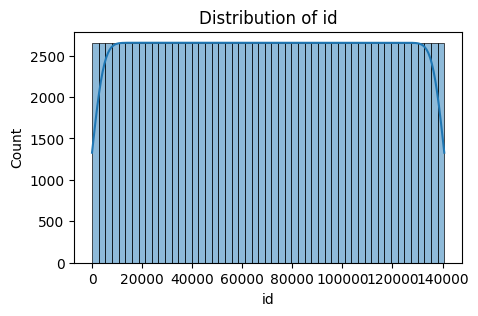

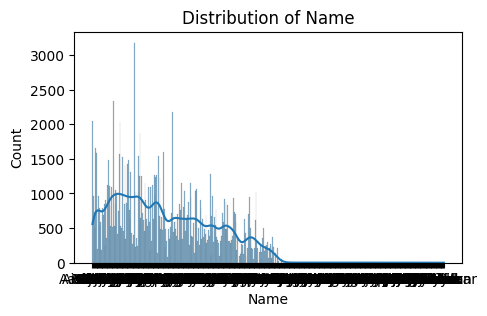

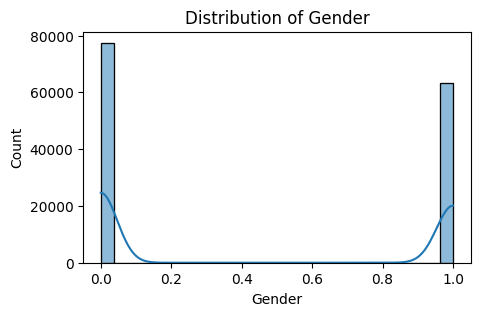

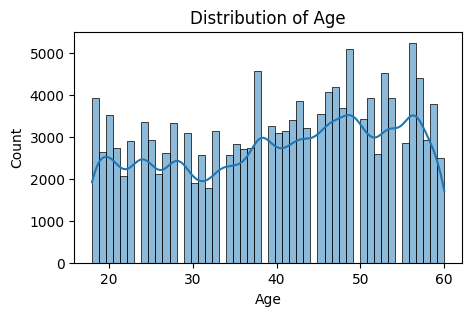

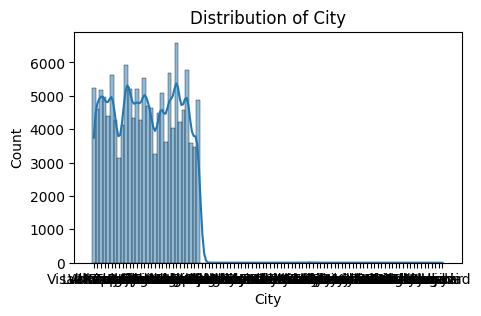

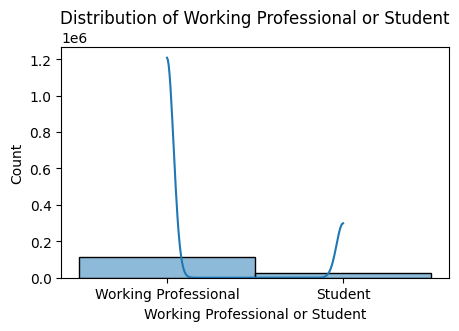

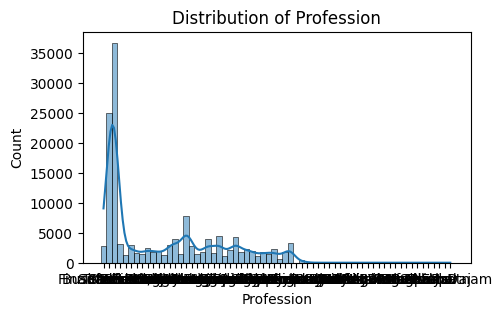

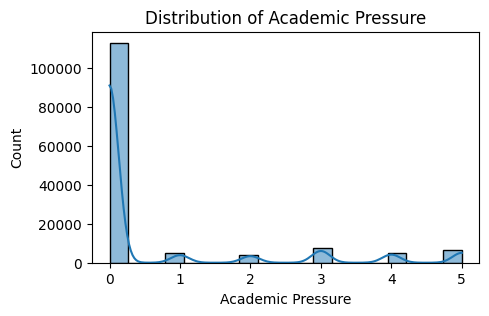

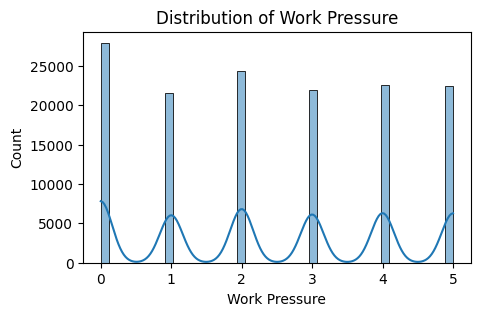

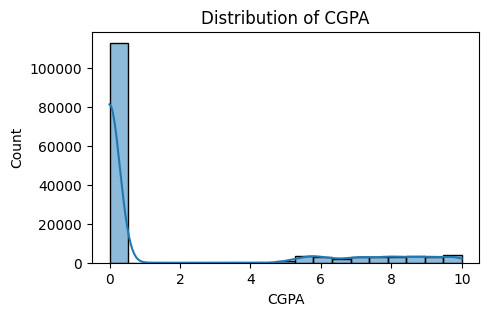

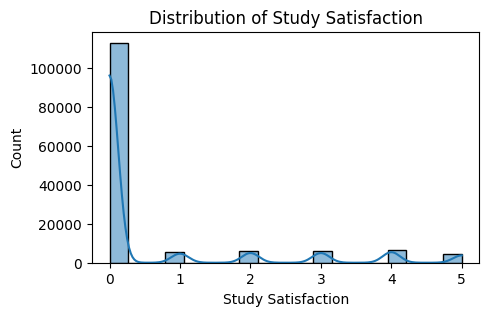

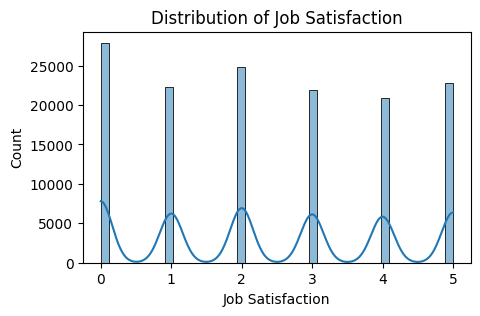

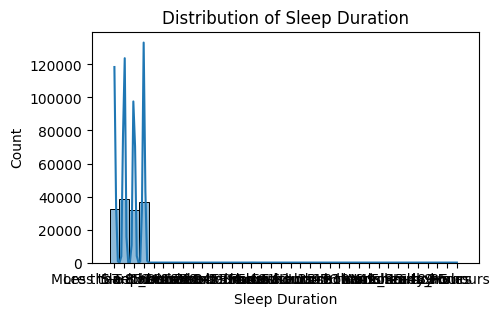

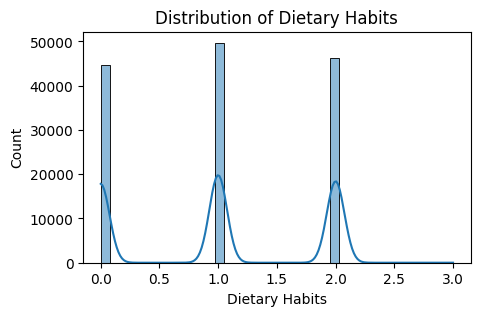

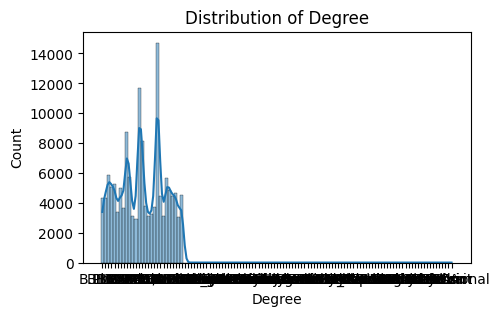

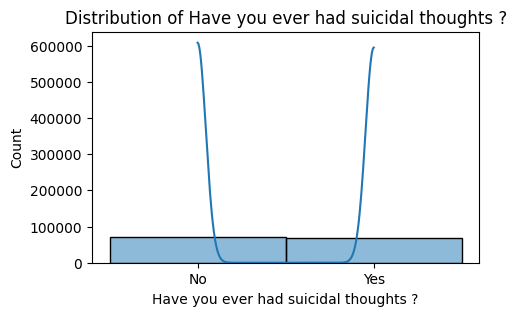

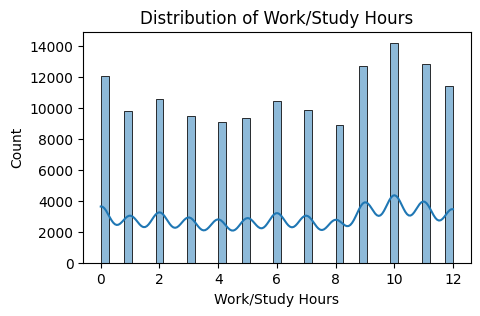

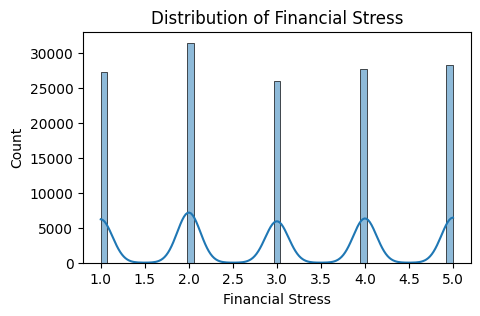

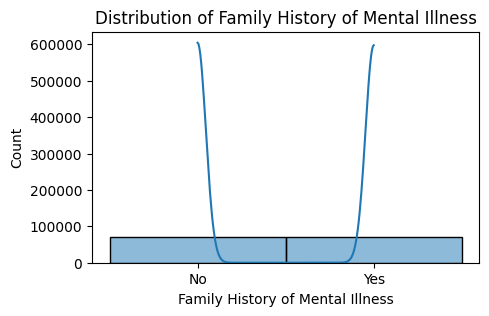

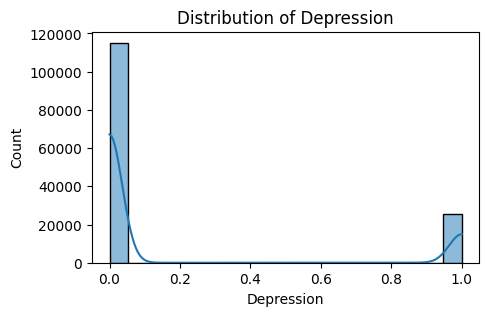

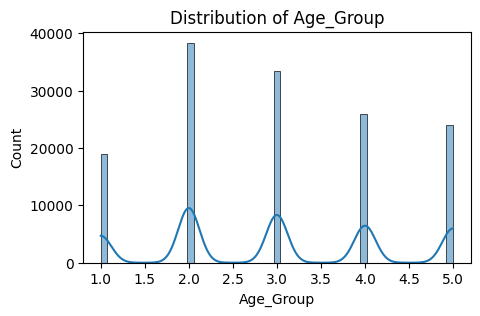

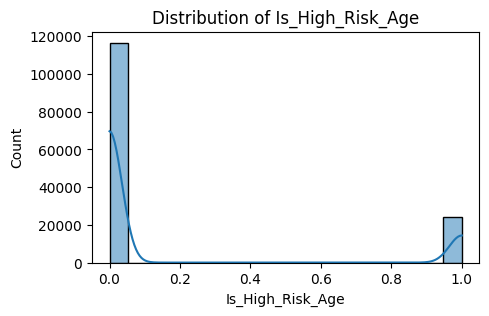

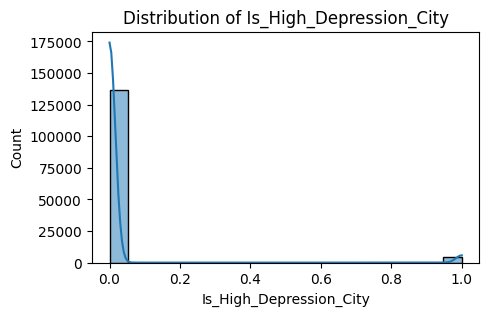

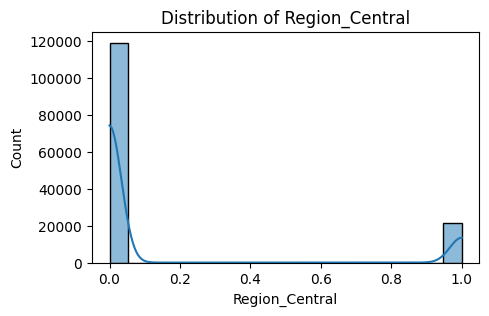

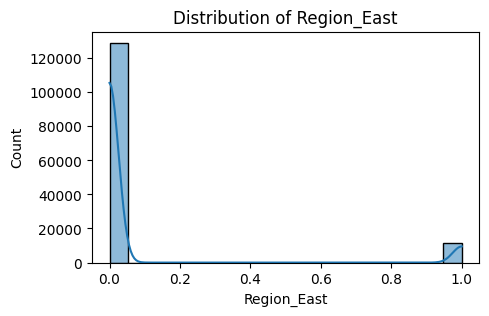

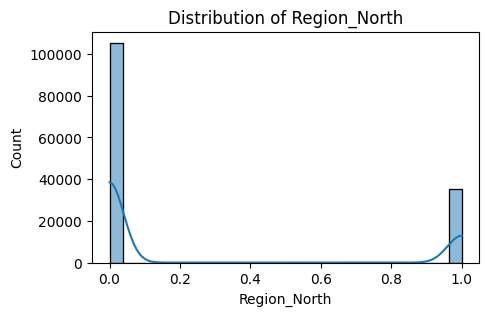

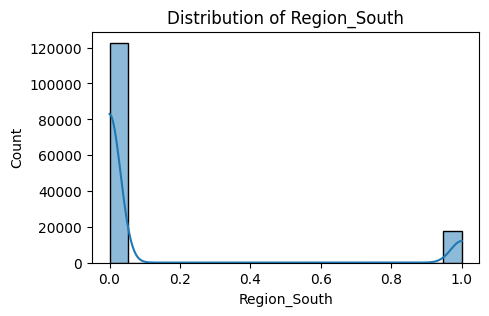

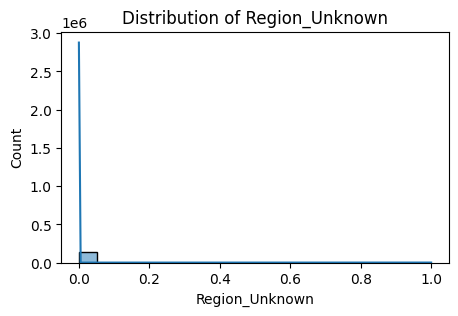

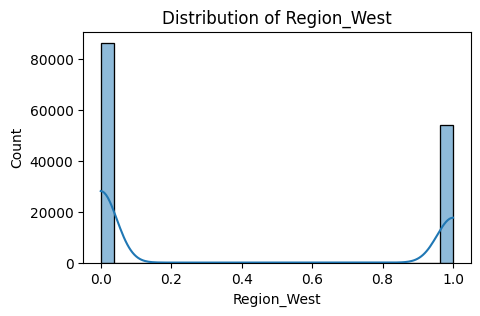

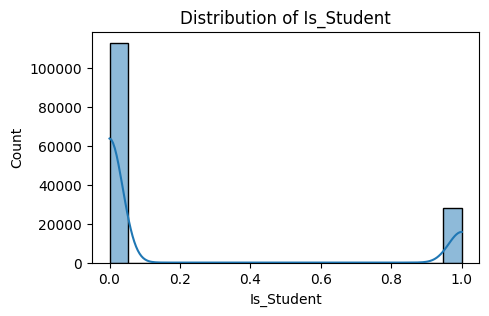

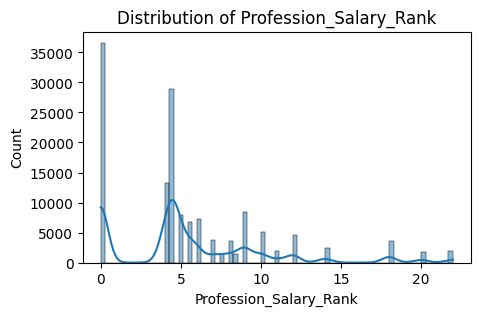

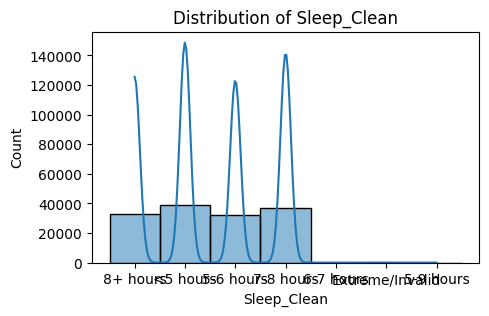

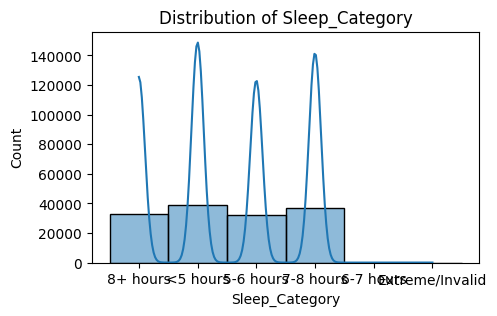

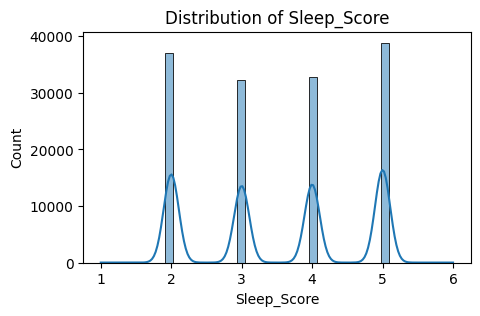

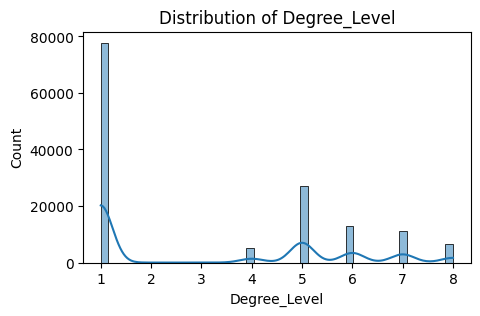

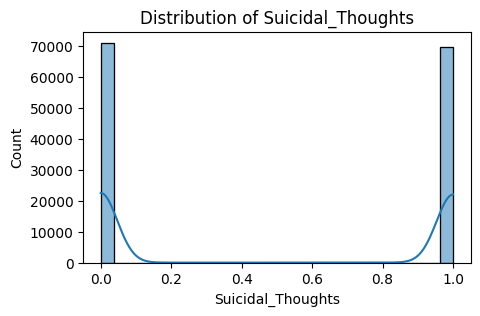

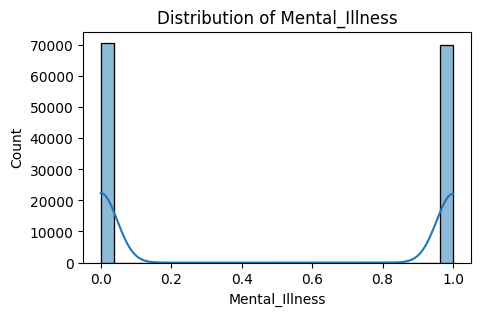

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in train_encoded.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(train_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Check Outliers

In [ ]:
def plot_boxplot(df):
  # Filter only numerical columns
  numerical_cols = df.select_dtypes(include=["number"]).columns

  for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

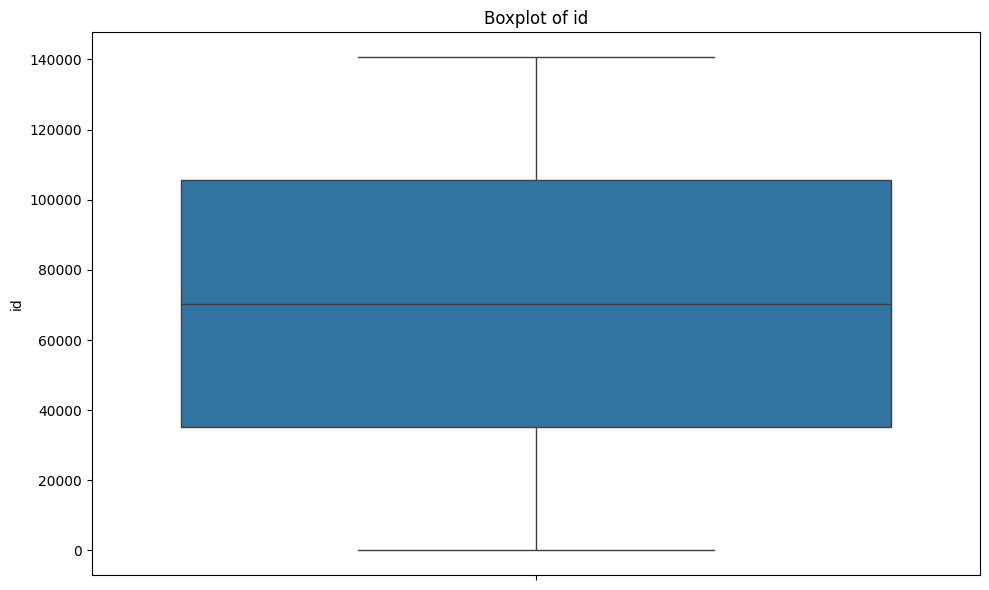

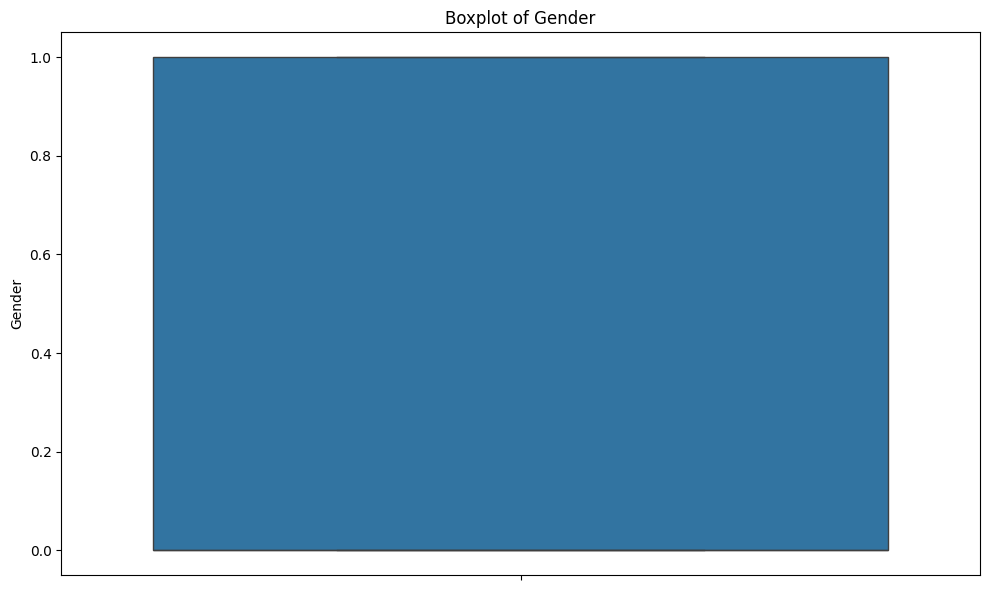

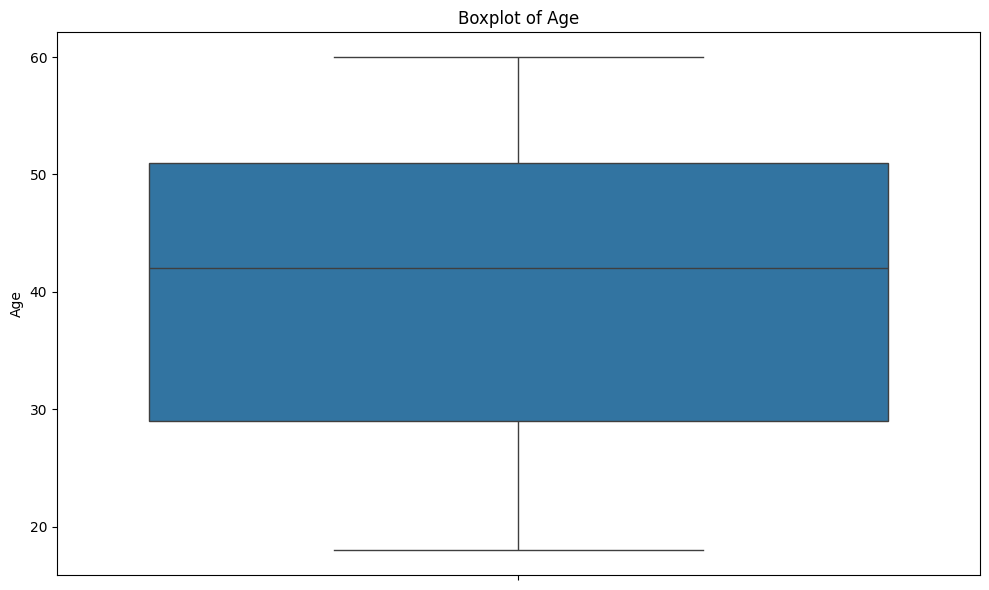

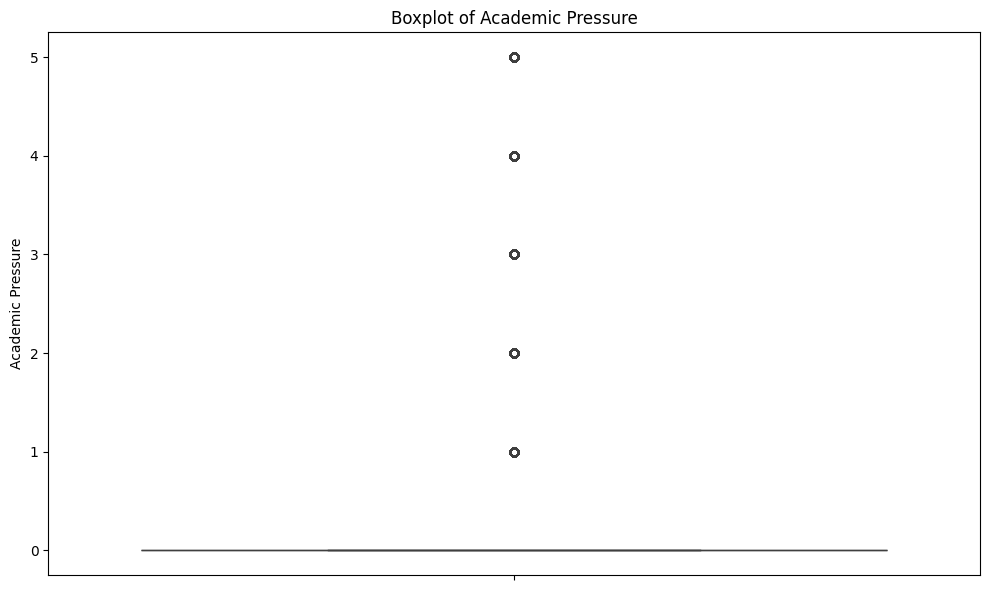

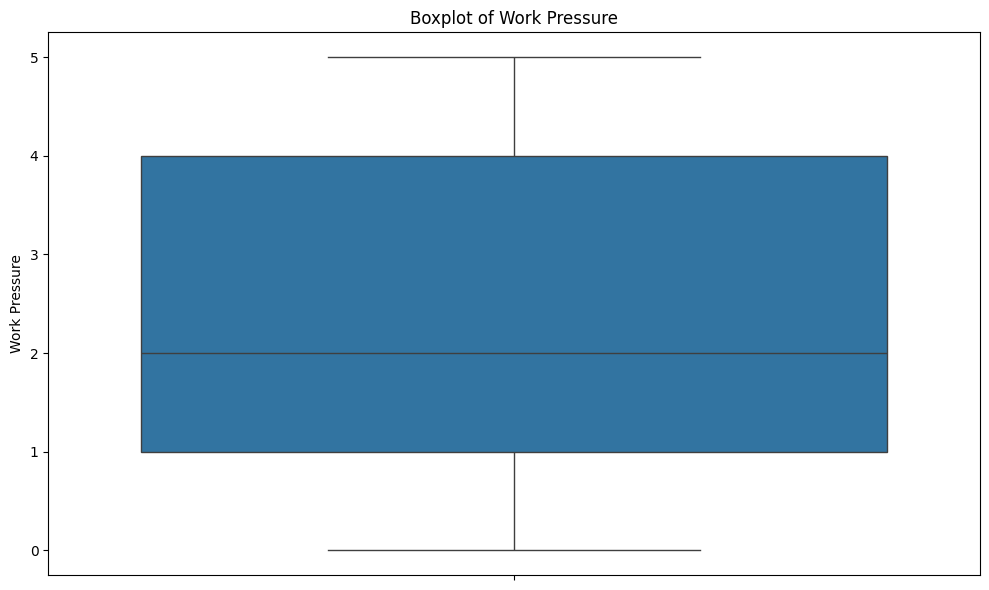

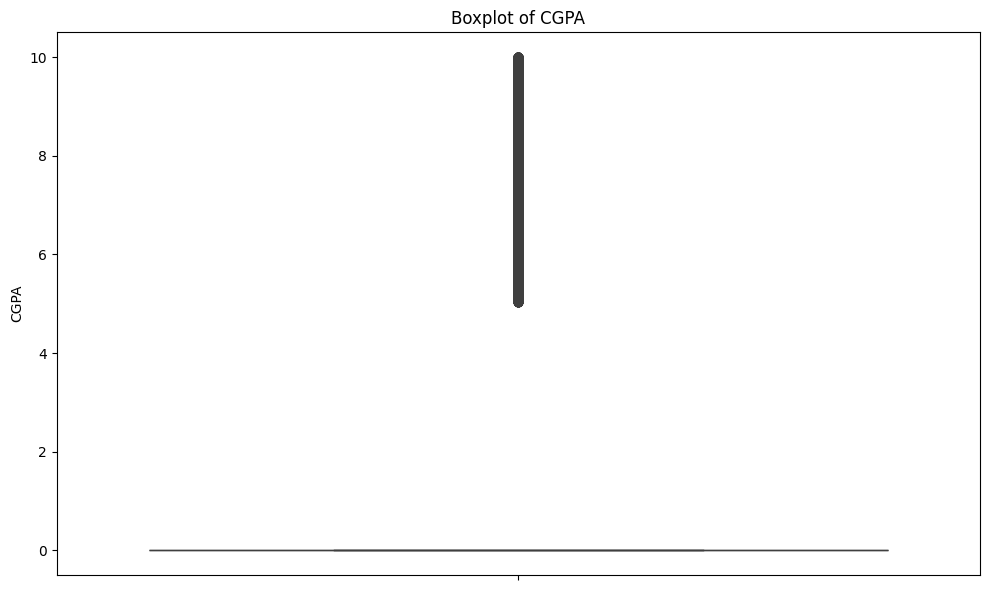

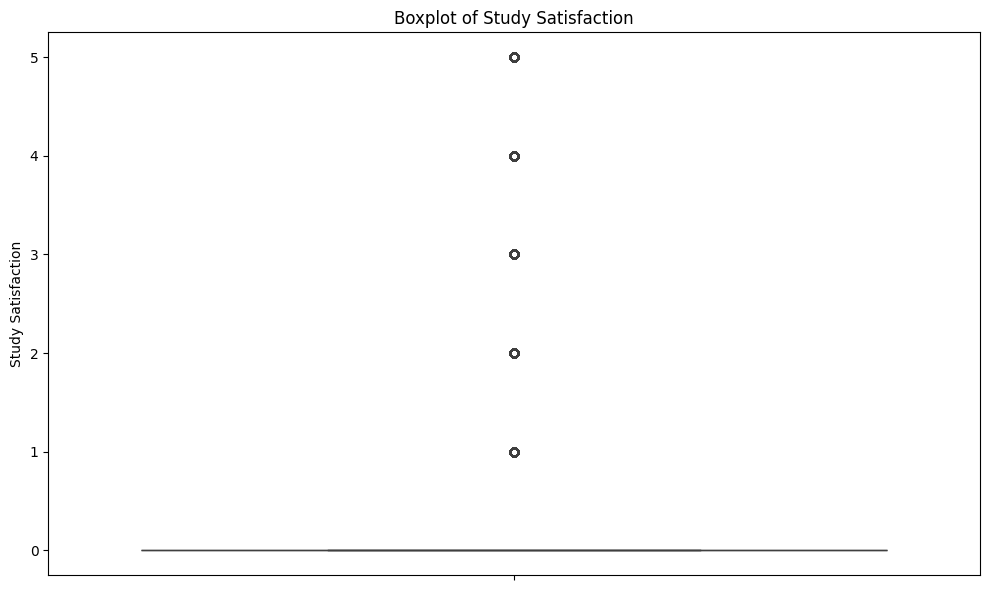

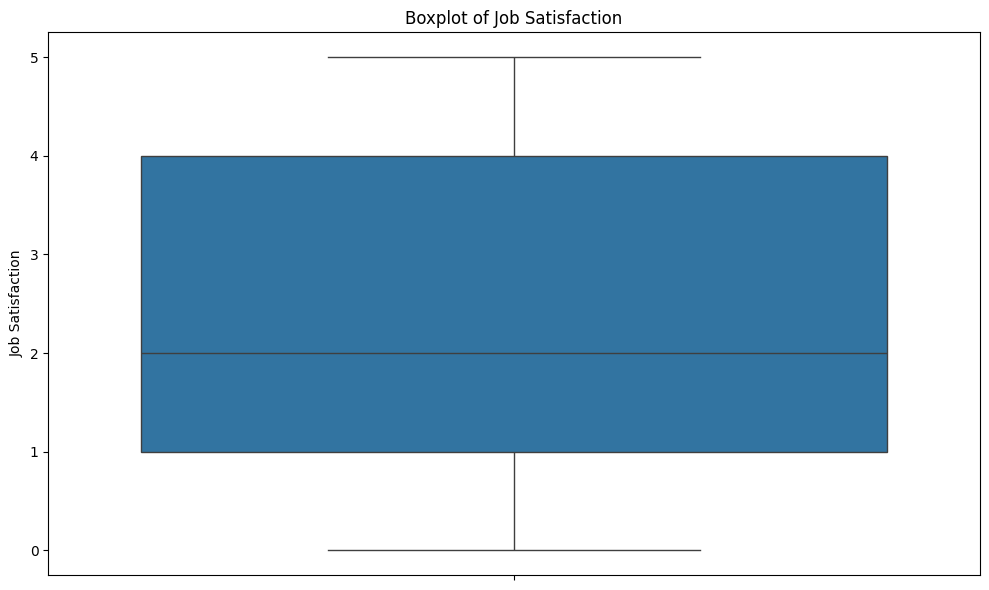

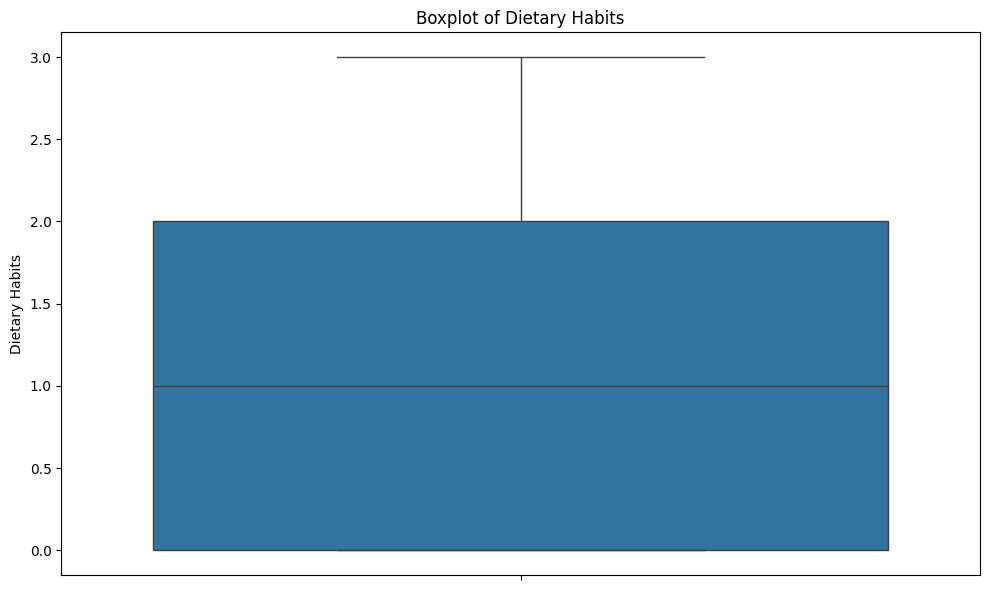

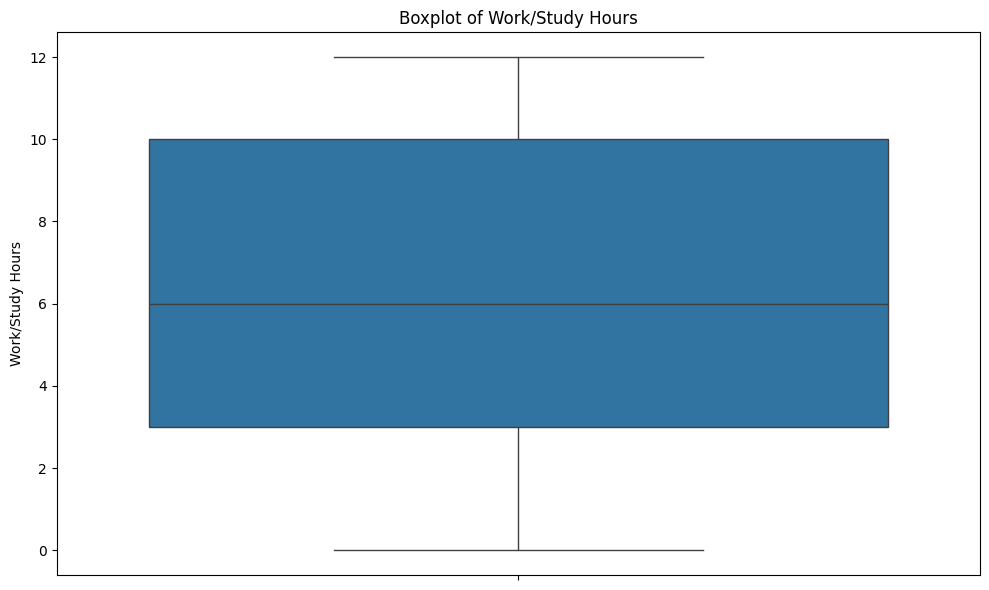

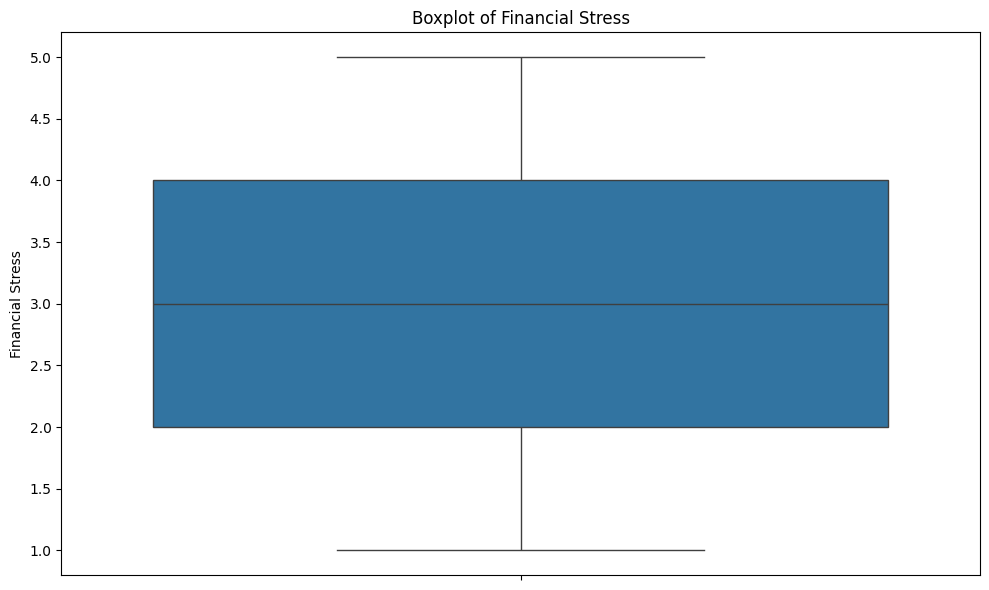

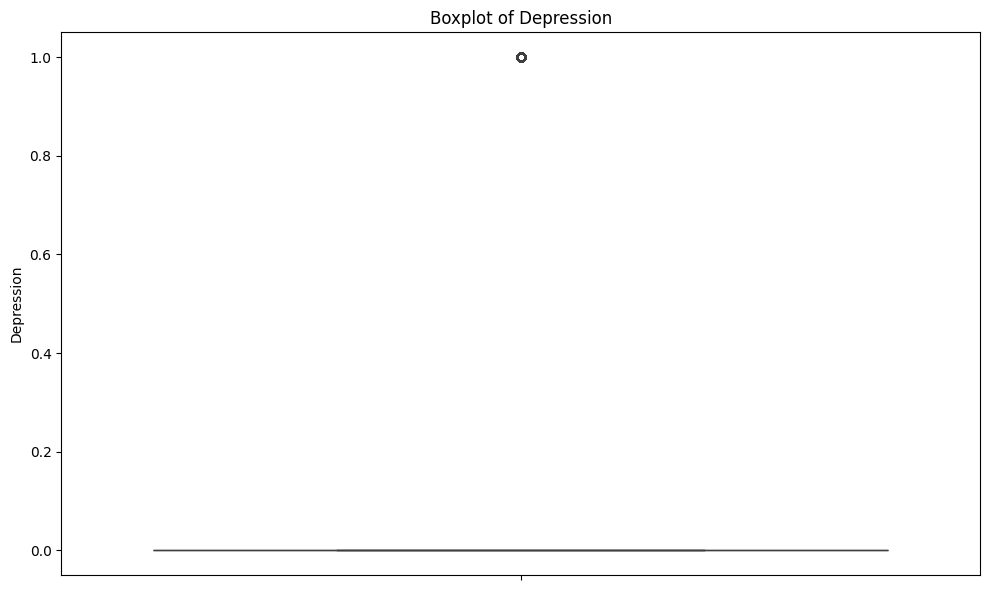

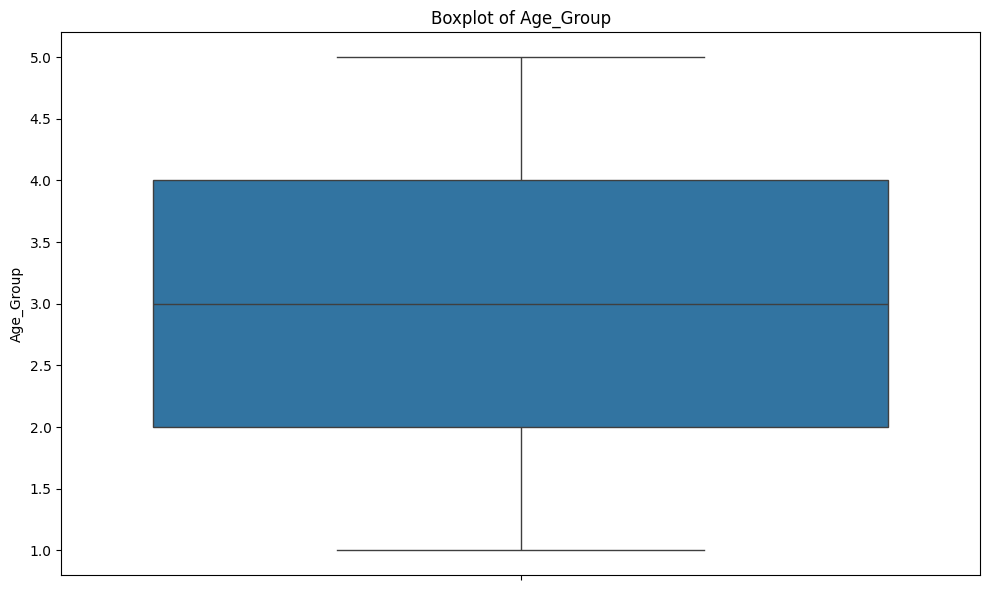

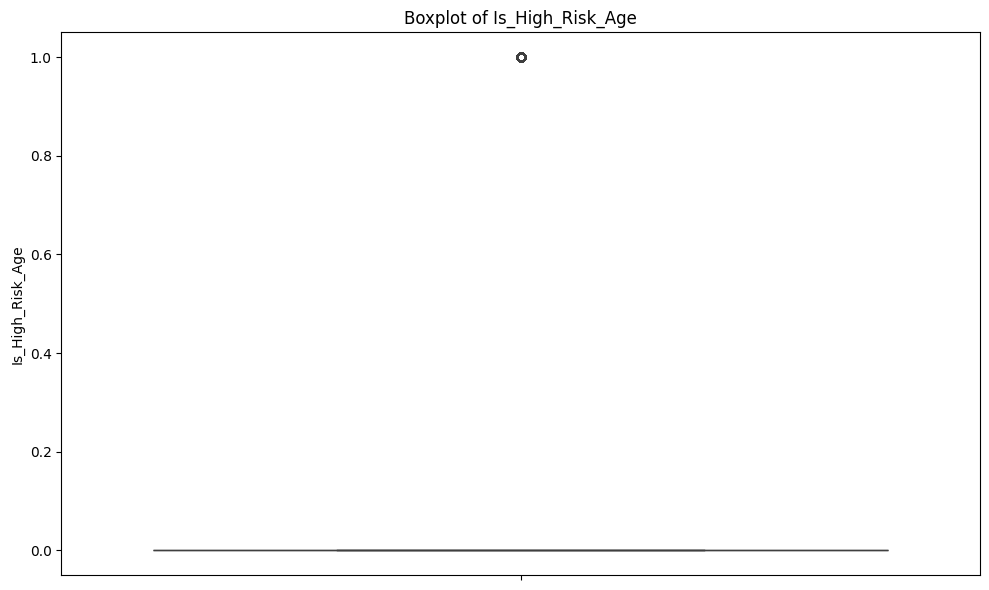

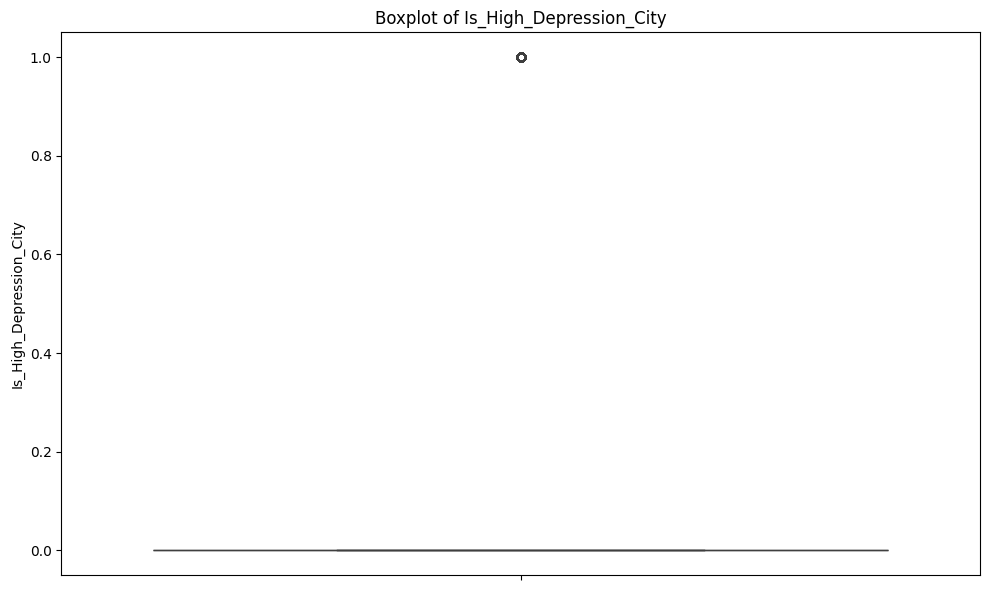

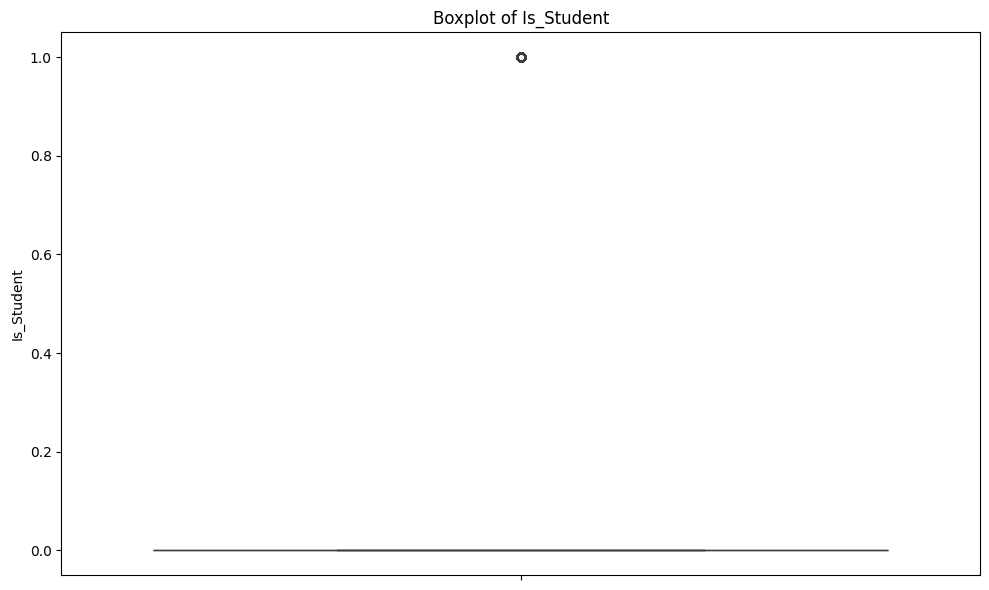

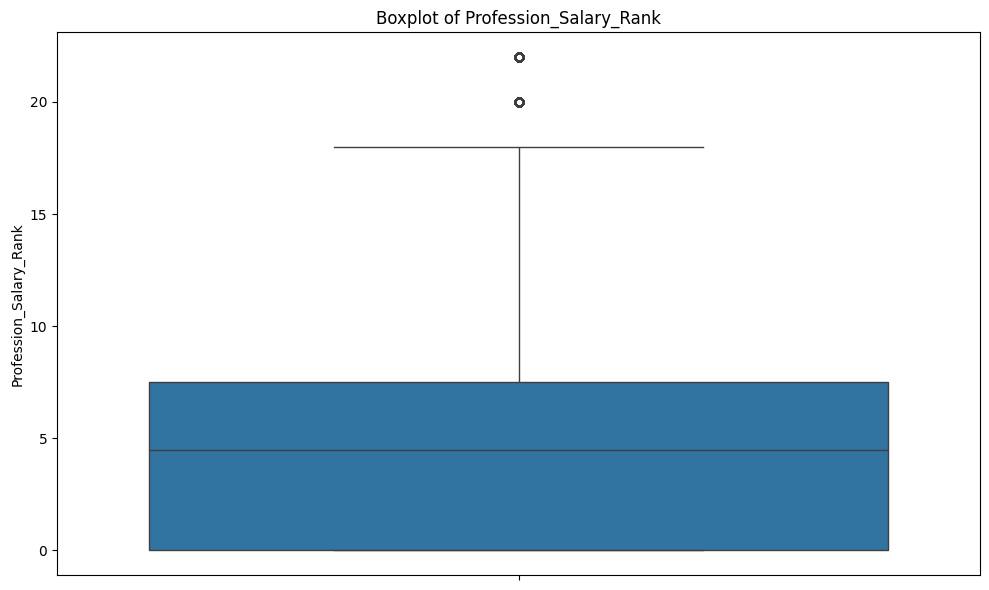

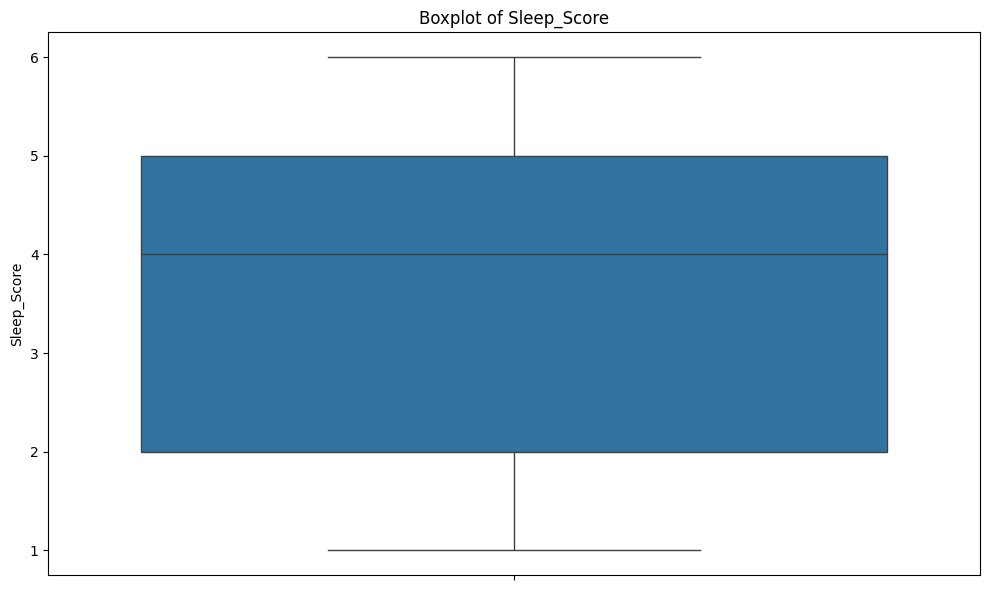

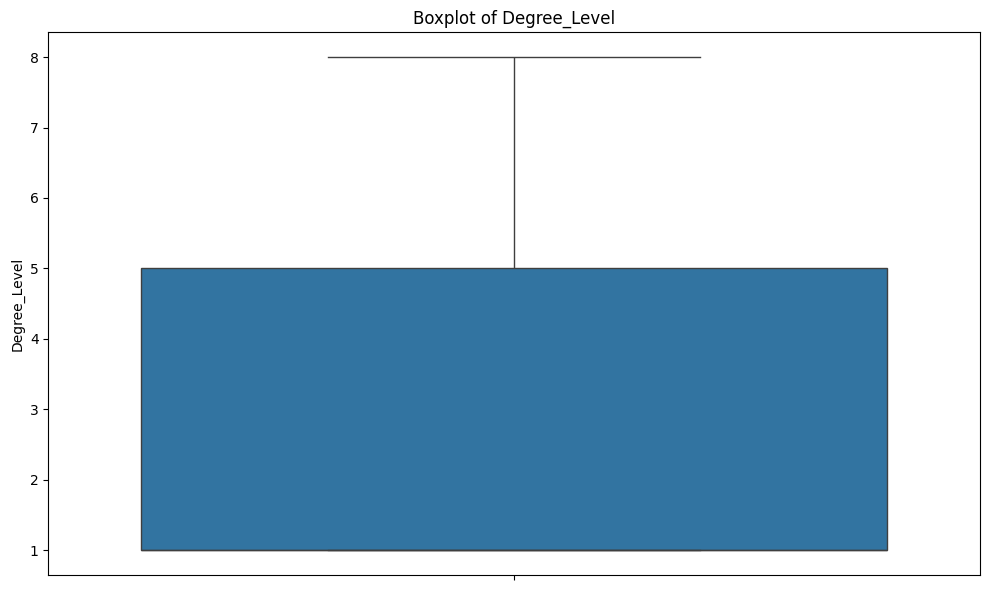

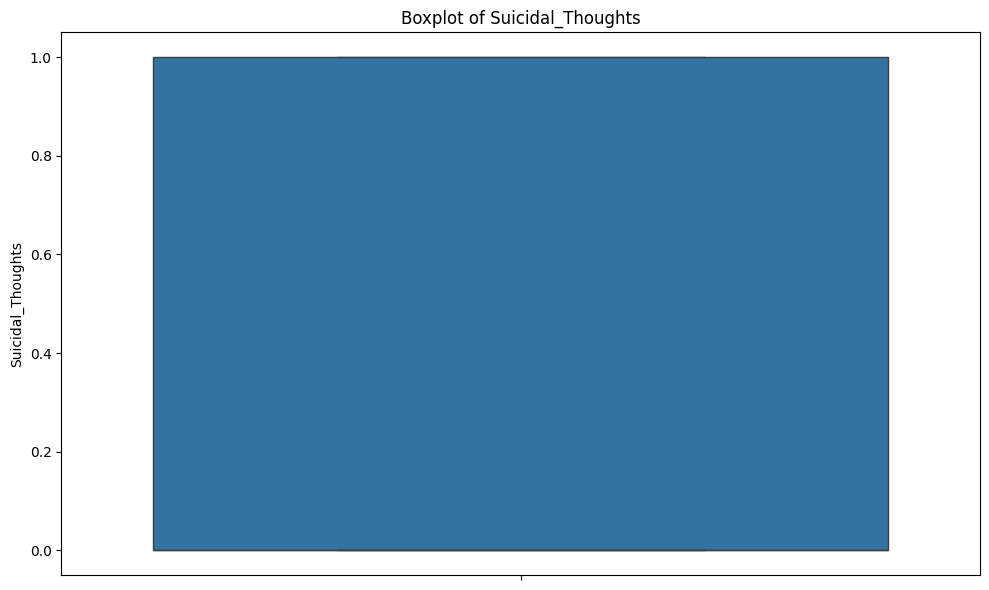

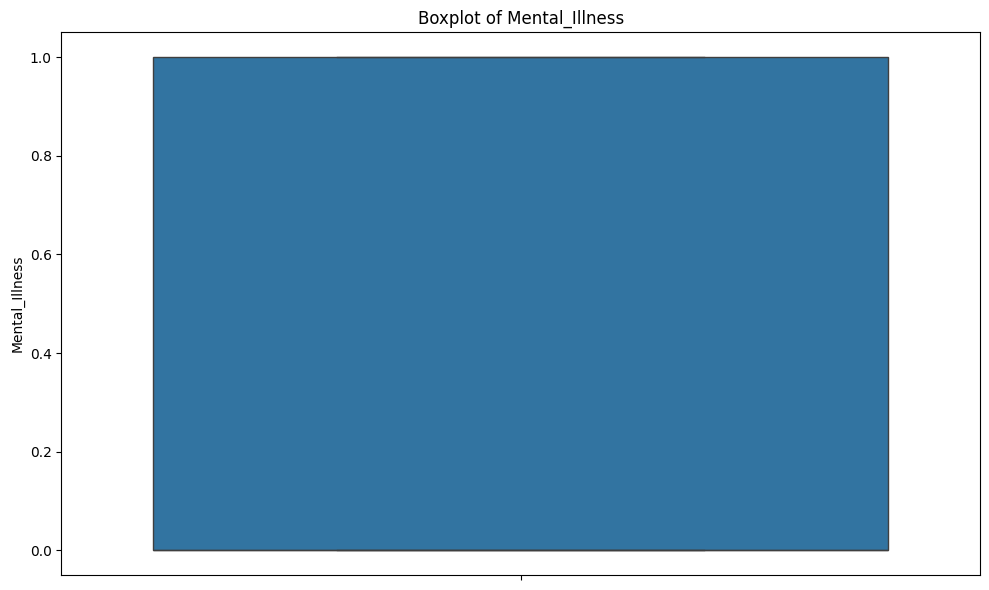

In [ ]:
plot_boxplot(train_encoded)

In [ ]:
train_encoded.isna().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0


## Drop Unnecessary columns

In [ ]:
train_encoded.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Age_Group', 'Is_High_Risk_Age', 'Is_High_Depression_City',
       'Region_Central', 'Region_East', 'Region_North', 'Region_South',
       'Region_Unknown', 'Region_West', 'Is_Student', 'Profession_Salary_Rank',
       'Sleep_Clean', 'Sleep_Category', 'Sleep_Score', 'Degree_Level',
       'Suicidal_Thoughts', 'Mental_Illness'],
      dtype='object')

In [ ]:
train_encoded.dtypes

,0
id,int64
Name,object
Gender,int64
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [ ]:
unncessary_columns = ['Sleep Duration', "Sleep Duration", 'Sleep_Category',
                     'Name','Working Professional or Student','City','Profession',
                      "Family History of Mental Illness","Degree",
                      "Have you ever had suicidal thoughts ?","Age",
                      "Sleep_Clean",]

In [ ]:
unncessary_columns

['Sleep Duration',
 'Sleep Duration',
 'Sleep_Category',
 'Name',
 'Working Professional or Student',
 'City',
 'Profession',
 'Family History of Mental Illness',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Age',
 'Sleep_Clean']

In [ ]:
train_encoded.drop(unncessary_columns,axis=1,inplace = True)
test_encoded.drop(unncessary_columns,axis=1,inplace = True)

In [ ]:
train_encoded.columns

Index(['id', 'Gender', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits',
       'Work/Study Hours', 'Financial Stress', 'Depression', 'Age_Group',
       'Is_High_Risk_Age', 'Is_High_Depression_City', 'Region_Central',
       'Region_East', 'Region_North', 'Region_South', 'Region_Unknown',
       'Region_West', 'Is_Student', 'Profession_Salary_Rank', 'Sleep_Score',
       'Degree_Level', 'Suicidal_Thoughts', 'Mental_Illness'],
      dtype='object')

In [ ]:
train_encoded.isna().sum()

,0
id,0
Gender,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Dietary Habits,0
Work/Study Hours,0
Financial Stress,0


# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = train_encoded.drop("Depression",axis=1)
y = train_encoded["Depression"]

X_train,X_val,y_train,y_val = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

In [ ]:
X_train.shape

(112560, 25)

In [ ]:
X_val.shape

(28140, 25)

In [ ]:
y_train.shape

(112560,)

In [ ]:
y_val.shape

(28140,)

In [ ]:
train_encoded.isna().sum()

,0
id,0
Gender,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Dietary Habits,0
Work/Study Hours,0
Financial Stress,0


# Feature Scaling

* **My Data is not normal distributed so I will not use standard scaler**
* **MY Data have very little outliers and I want to prserves the original distribution so I will use the Min Max Scaler**

In [ ]:
# Save IDs and reset index
train_ids = X_train.reset_index(drop=True)['id']  # Explicitly drop old index
test_ids = test_encoded.reset_index(drop=True)['id']


In [ ]:

from sklearn.preprocessing import MinMaxScaler
# Scale features (drop ID)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.drop('id', axis=1))
X_test_scaled = scaler.transform(test_encoded.drop('id', axis=1))

# Reattach IDs with aligned indices
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns.drop('id'))
X_train_scaled_df['id'] = train_ids.values  # Use .values to ensure alignment

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_encoded.columns.drop('id'))
X_test_scaled_df['id'] = test_ids.values  # No NaN now!


In [ ]:
X_val_scaled = scaler.transform(X_val.drop('id', axis=1))

Reattach IDs after scalling

# Class Imbalance Handling

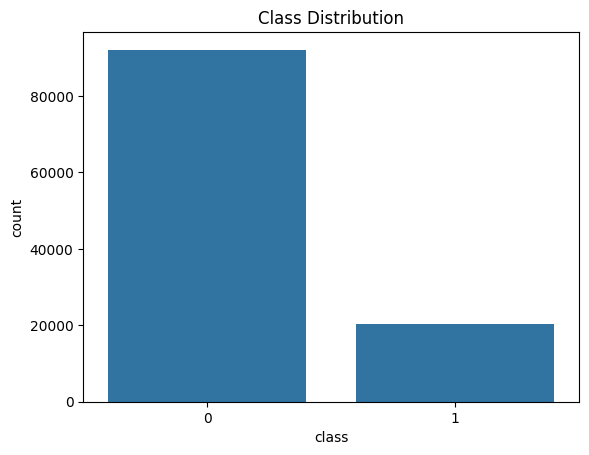

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.xlabel("class")
plt.ylabel("count")
plt.show()

**Try SMOTE + ENN**
* Balances the dataset and cleans noise.

* Works well for complex decision boundaries.

* Reduces overfitting compared to SMOTE alone.

**We should NOT resample X_val_scaled,y_val and X_test_scaled why?**


🔹 Validation Set (X_val_scaled, y_val)
* The validation set is used to evaluate how well your model performs on data it hasn’t seen.

* Resampling it would give you an unrealistic estimate of model performance.

* Keep it as-is to ensure your model generalizes correctly.

🔹 Test Set (X_test_scaled)
* The test set should represent real-world data distribution.

* It's your final evaluation, so it must remain untouched and imbalanced if that’s the nature of your data.




In [ ]:
X_train_scaled_df.isna().sum()

,0
Gender,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Dietary Habits,0
Work/Study Hours,0
Financial Stress,0
Age_Group,0


In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled_enn , y_train_resampled_enn = smote_enn.fit_resample(X_train_scaled_df,y_train)


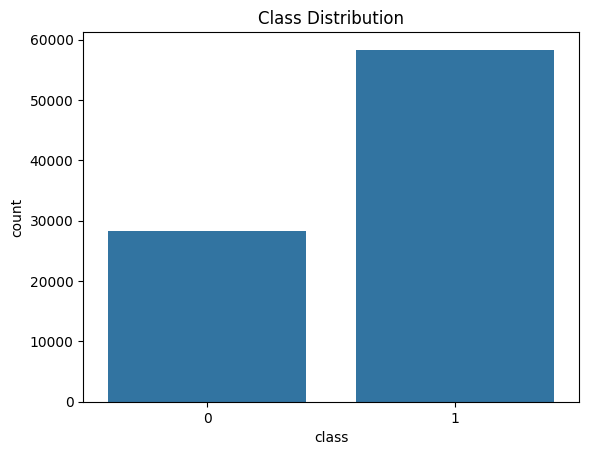

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_resampled_enn)
plt.title("Class Distribution")
plt.xlabel("class")
plt.ylabel("count")
plt.show()

# Modelling

In [ ]:
X_train_resampled_enn.shape

(86595, 25)

**According to there are a severe class imbalance so will tend to ensemble models like XGBoost & NN with focal loss**

**According to the data size is bigger than 100K reached to 165000 row we will not use simple ML models such as logestic regression or SVM**

In [ ]:
# Save IDs for later (e.g., Kaggle submission)
train_ids = X_train_resampled_enn['id']  # If IDs are in your resampled data
test_ids = X_test_scaled_df['id']                  # For test data

# Drop ID column from features BEFORE training
X_train_features = X_train_resampled_enn.drop('id', axis=1)
X_test_features = X_test_scaled_df.drop('id', axis=1)


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    eval_metric='logloss',        # evaluation metric
    use_label_encoder=False,      # to avoid warnings
    random_state=42
)

# Train the model
xgb_clf.fit(X_train_features, y_train_resampled_enn)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:40:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Evaluate on X_val

In [ ]:
# Make predictions on validation set
y_pred = xgb_clf.predict(X_val_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nAccuracy:", accuracy_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     23027
           1       0.75      0.88      0.81      5113

    accuracy                           0.92     28140
   macro avg       0.86      0.91      0.88     28140
weighted avg       0.93      0.92      0.93     28140


Confusion Matrix:
[[21494  1533]
 [  631  4482]]

Accuracy: 0.9230987917555081


# Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
#Computes the ratio of negative class (0) samples to positive class (1) samples.
ratio = len(y_train_resampled_enn[y_train_resampled_enn == 0] / len(y_train_resampled_enn[y_train_resampled_enn == 1]))
ratio

28243

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [400,350, 300],  # Reduced from typical ranges to save time
    'max_depth': [7,10,15],           # Shallower trees first
    'learning_rate': [0.01,0.02,0.05],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 0.9],
    'gamma': [0.2,0.4,0.6],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.001, 0.01],
    'reg_lambda': [0, 0.001, 0.01]

}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,               # Reduced number of iterations
    scoring='accuracy',            # Use appropriate metric for your problem
    cv=3,                    # Fewer folds to save time
    verbose=1,
    random_state=42,
    n_jobs=-1                # Use all available cores
)

# Fit the random search model
random_search.fit(X_train_features, y_train_resampled_enn)



Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:52:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           random_state=42, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 0.9],
                                        'gamma': [0.2, 0.4, 0.6],
                                        'learning_rate': [0.01, 0.02, 0.05],
                                        'max_depth': [7, 10, 15],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [400, 350, 300],
                                        'reg_alpha': [0, 0.001, 0.01],
                                        'reg_lambda': [0, 0.001, 0.01],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.6, 'colsample_bytree': 0.9}


# Evaluate the Tuned Model

In [ ]:
# Make predictions with the best estimator
y_pred_tuned = best_estimator.predict(X_val_scaled)

# Evaluate the tuned model
print("\nTuned Model Classification Report:")
print(classification_report(y_val, y_pred_tuned))
print("\nTuned Model Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_tuned))
print("\nTuned Model Accuracy:", accuracy_score(y_val, y_pred_tuned))


Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     23027
           1       0.73      0.89      0.80      5113

    accuracy                           0.92     28140
   macro avg       0.85      0.91      0.87     28140
weighted avg       0.93      0.92      0.92     28140


Tuned Model Confusion Matrix:
[[21339  1688]
 [  586  4527]]

Tuned Model Accuracy: 0.9191897654584221


#  Final Model Training and Test Prediction

In [ ]:
final_model = xgb.XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train_features, y_train_resampled_enn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on test set
test_predictions = final_model.predict(X_test_scaled)

# Check Validation Performance

In [ ]:
from sklearn.metrics import classification_report

# Predict on validation data (X_val_scaled)
val_predictions = final_model.predict(X_val_scaled)

# Print classification report (since you have y_val)
print("Validation Set Performance:")
print(classification_report(y_val, val_predictions))

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     23027
           1       0.73      0.89      0.80      5113

    accuracy                           0.92     28140
   macro avg       0.85      0.91      0.87     28140
weighted avg       0.93      0.92      0.92     28140



# Final model with scale_pos_weight


In [ ]:
#Computes the ratio of negative class (0) samples to positive class (1) samples.
ratio = len(y_train_resampled_enn[y_train_resampled_enn == 0] / len(y_train_resampled_enn[y_train_resampled_enn == 1]))
ratio

28243

In [ ]:
X

,id,Gender,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Work/Study Hours,Financial Stress,...,Region_North,Region_South,Region_Unknown,Region_West,Is_Student,Profession_Salary_Rank,Sleep_Score,Degree_Level,Suicidal_Thoughts,Mental_Illness
0,0,1,0.0,5.0,0.00,0.0,2.0,0,1.0,2.0,...,True,False,False,False,0,4.5,4,5.0,0,0
1,1,0,0.0,4.0,0.00,0.0,3.0,2,7.0,3.0,...,False,False,False,False,0,4.5,5,6.0,1,0
2,2,0,5.0,0.0,8.97,2.0,0.0,0,3.0,1.0,...,False,True,False,False,1,0.0,3,1.0,1,0
3,3,0,0.0,5.0,0.00,0.0,1.0,1,10.0,1.0,...,False,False,False,True,0,4.5,5,5.0,1,1
4,4,1,0.0,1.0,0.00,0.0,1.0,2,9.0,4.0,...,False,False,False,False,0,12.0,3,5.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,1,0.0,5.0,0.00,0.0,4.0,2,2.0,4.0,...,False,False,False,True,0,0.0,3,1.0,0,1
140696,140696,1,0.0,5.0,0.00,0.0,4.0,1,6.0,5.0,...,False,True,False,False,0,4.0,2,1.0,1,1
140697,140697,1,0.0,3.0,0.00,0.0,1.0,1,4.0,4.0,...,False,False,False,False,0,11.0,4,5.0,0,0
140698,140698,1,0.0,5.0,0.00,0.0,2.0,1,10.0,1.0,...,True,False,False,False,0,4.0,3,1.0,1,0


In [ ]:
#Assigns a penalty weight to the minority class (1) during training.
#The model will prioritize correcting errors on the minority class by scaling its importance.
final_model_with_scale_pos_weight = xgb.XGBClassifier(scale_pos_weight=5, **best_params)

final_model_with_scale_pos_weight.fit(X_train_features,y_train_resampled_enn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_val_scaled.shape

(28140, 24)

In [ ]:
# Predict on validation data (X_val_scaled)
val_predictions_weight = final_model_with_scale_pos_weight.predict(X_val_scaled)

# Print classification report (since you have y_val)
print("Validation Set Performance:")
print(classification_report(y_val, val_predictions_weight))

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     23027
           1       0.59      0.95      0.73      5113

    accuracy                           0.87     28140
   macro avg       0.79      0.90      0.82     28140
weighted avg       0.92      0.87      0.88     28140



In [ ]:
!pip install optuna
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
    }

    # Create DMatrix for training and evaluation
    #Drop the 'id' column from X_val before creating the DMatrix
    dtrain = xgb.DMatrix(X_train_features, label=y_train_resampled_enn)
    dval = xgb.DMatrix(X_val.drop('id', axis=1), label=y_val) # This will ensure feature consistency

    # Train using xgb.train with early stopping
    model = xgb.train(params, dtrain,
                      evals=[(dval, 'eval')],
                      early_stopping_rounds=10,
                      verbose_eval=False)

    # Predict on validation set and calculate accuracy
    y_pred = model.predict(dval)
    y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]  # Convert probabilities to binary predictions

    return accuracy_score(y_val, y_pred_binary)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
best_params = study.best_params

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.8 MB/s eta 0:00:00


[I 2025-05-04 02:53:12,882] A new study created in memory with name: no-name-4b79b0ac-49e9-436c-a529-38ca2e55f3fe
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:53:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-04 02:53:13,249] Trial 0 finished with value: 0.8722459132906895 and parameters: {'n_estimators': 212, 'max_depth': 4, 'learning_rate': 0.15322770470142752, 'subsample': 0.812879027128825, 'colsample_bytree': 0.9603411192454024}. Best is trial 0 with value: 0.8722459132906895.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:53:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-04 02:53:14,795] Trial 1 finished with value: 0.582089552238806 and parameters: {'n_estimators': 134, 'max_depth': 8, 'learning_rate': 0.0639840335429278, 'subsample': 0.94

In [ ]:
best_params

{'n_estimators': 212,
 'max_depth': 4,
 'learning_rate': 0.15322770470142752,
 'subsample': 0.812879027128825,
 'colsample_bytree': 0.9603411192454024}

In [ ]:
# Train final model with best parameters
final_model_optuna = xgb.XGBClassifier(**best_params, random_state=42)
final_model_optuna.fit(X_train_features, y_train_resampled_enn)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9603411192454024, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15322770470142752,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=212, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:

# Predict on validation data (X_val_scaled)
val_predictions_optuna = final_model_optuna.predict(X_val_scaled) # Ensure feature consistency


In [ ]:
# Print classification report (since you have y_val)
print("Validation Set Performance:")
print(classification_report(y_val, val_predictions_optuna))

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     23027
           1       0.75      0.88      0.81      5113

    accuracy                           0.92     28140
   macro avg       0.86      0.91      0.88     28140
weighted avg       0.93      0.92      0.93     28140



# ROC-Curve

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,RocCurveDisplay

y_probs = xgb_clf.predict_proba(X_val_scaled)[:,1]

auc = roc_auc_score(y_val,y_probs)
print("AUC:",auc)

fpr,tpr,thresholds = roc_curve(y_val,y_probs)

AUC: 0.9677405415904293


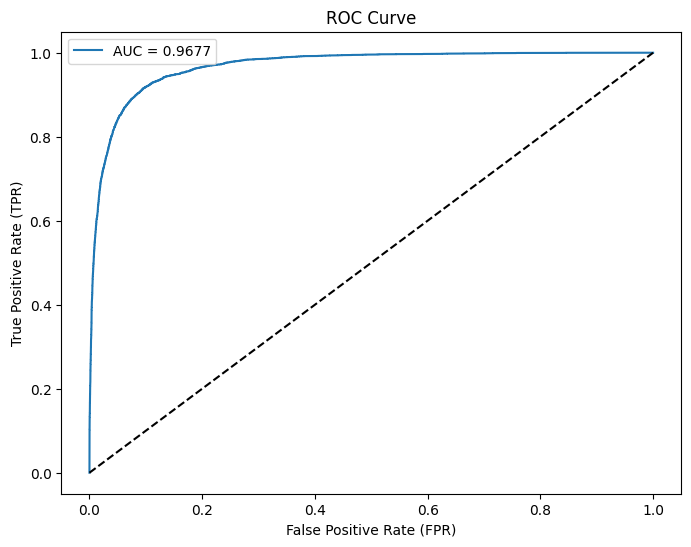

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Try Ensempling using XGBoost + Logesitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    C=0.1,                  # Regularization strength
    solver='liblinear',      # Works well for small datasets
    class_weight='balanced', # Handles residual class imbalance
    random_state=42
)
logreg.fit(X_train_features, y_train_resampled_enn)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [ ]:
from sklearn.ensemble import VotingClassifier

# Soft voting (weighted average of probabilities)
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('logreg', logreg)
    ],
    voting='soft',  # Use 'soft' for probability-based voting
    weights=[0.7, 0.3]  # Adjust based on model performance
)

# Train ensemble
ensemble.fit(X_train_features, y_train_resampled_enn)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:53:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learni...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('logreg',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft', weights=[0.7, 0.3])

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Validation predictions
y_pred_val = ensemble.predict(X_val_scaled)
y_probs_val = ensemble.predict_proba(X_val_scaled)[:, 1]

print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_val):.4f}")
print(f"Validation AUC: {roc_auc_score(y_val, y_probs_val):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Validation Accuracy: 0.9220
Validation AUC: 0.9695


In [ ]:

# Print classification report
print("Ensemble Model Classification Report:")
print(classification_report(y_val, y_pred_val))

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     23027
           1       0.74      0.89      0.81      5113

    accuracy                           0.92     28140
   macro avg       0.86      0.91      0.88     28140
weighted avg       0.93      0.92      0.92     28140



# Submission

In [ ]:
print("Original test shape:", test.shape)
print("After encoding:", test_encoded.shape)  # If you encoded
print("After scaling:", X_test_scaled.shape)  # Final features

Original test shape: (93800, 19)
After encoding: (93800, 25)
After scaling: (93800, 24)


In [ ]:
submission = pd.DataFrame(
    {'id': test_encoded["id"],
     'Depression': test_predictions})
submission.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [ ]:
submission.to_csv('final_submission.csv', index=False)

In [1]:
# Clean metadata in Colab
import nbformat

path = '/content/your_notebook_name.ipynb'  # Replace with your actual file path
with open(path, 'r') as f:
    nb = nbformat.read(f, as_version=4)

if 'widgets' in nb['metadata']:
    del nb['metadata']['widgets']

with open(path, 'w') as f:
    nbformat.write(nb, f)


FileNotFoundError: [Errno 2] No such file or directory: '/content/your_notebook_name.ipynb'